# Przetwarzanie jƒôzyka naturalnego


## Wstƒôp

Obecnie najpopularniejsze model s≈Çu≈ºƒÖce do przetwarzania jƒôzyka naturalnego wykorzystujƒÖ architekturƒô transformacyjnƒÖ. Istnieje kilka bibliotek, implementujƒÖcych tƒô architekturƒô, ale w kontek≈õcie NLP najczƒô≈õciej wykorzystuje siƒô [Huggingface transformers](https://huggingface.co/docs/transformers/index).

Biblioteka ta poza samym [kodem ≈∫r√≥d≈Çowym](https://github.com/huggingface/transformers), zawiera szereg innych element√≥w. Do najwa≈ºniejszych z nich nale≈ºƒÖ:
* [modele](https://huggingface.co/models) - olbrzymia i ciƒÖgle rosnƒÖca liczba gotowych modeli, kt√≥rych mo≈ºemy u≈ºyƒá do rozwiƒÖzywania wielu problem√≥w z dziedziny NLP (ale r√≥wnie≈º w zakresie rozpoznawania mowy, czy przetwarzania obrazu),
* [zbiory danych](https://huggingface.co/datasets) - bardzo du≈ºy katalog przydatnych zbior√≥w danych, kt√≥re mo≈ºemy w prosty spos√≥b wykorzystaƒá do trenowania w≈Çasnych modeli NLP (oraz innych modeli).

## Weryfikacja dostƒôpno≈õci GPU

Trening modeli NLP wymaga dostƒôpu do akcelerator√≥w sprzƒôtowych, przyspieszajƒÖcych uczenie sieci neuronowych. Je≈õli nasz komputer nie jest wyposa≈ºony w GPU, to mo≈ºemy skorzystaƒá ze ≈õrodowiska Google Colab.

[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/apohllo/sztuczna-inteligencja/blob/master/lab5/lab_5.ipynb)

W tym ≈õrodowisku mo≈ºemy wybraƒá akcelerator spo≈õr√≥d GPU i TPU.

Sprawd≈∫my, czy mamy dostƒôp do ≈õrodowiska wyposa≈ºonego w akcelerator NVidii:

!nvidia-smi

Je≈õli akcelerator jest niedostƒôpny (polecenie sko≈Ñczy≈Ço siƒô b≈Çƒôdem), to zmieniamy ≈õrodowisko wykonawcze wybierajƒÖc z menu "≈örodowisko wykonawcze" -> "Zmie≈Ñ typ ≈õrodowiska wykonawczego" -> GPU.

## Podpiƒôcie dysku Google

Kolejnym elementem przygotowa≈Ñ, kt√≥ry jest opcjonalny, jest do≈ÇƒÖczenie w≈Çasnego dysku Google Drive do ≈õrodowiska Colab. Dziƒôki temu mo≈ºliwe jest zapisywanie wytrenowanych modeli, w trakcie procesu treningu, na "zewnƒôtrznym" dysku. Je≈õli Google Colab doprowadzi do przerwania procesu treningu, to mimo wszystko pliki, kt√≥re uda≈Ço siƒô zapisaƒá w trakcie treningu nie przepadnƒÖ. Mo≈ºliwe bƒôdzie wznowienie treningu ju≈º na czƒô≈õciowo wytrenowanym modelu.

W tym celu montujemy dysk Google w Colabie. Wymaga to autoryzacji narzƒôdzia Colab w Google Drive.

from google.colab import drive
drive.mount('/content/gdrive')

Po podmontowaniu dysku mamy dostƒôp do ca≈Çej zawarto≈õci Google Drive. WskazujƒÖc miejsce zapisywania danych w trakcie treningu nale≈ºy wskazaƒá ≈õcie≈ºkƒô zaczynajƒÖcƒÖ siƒô od `/content/gdrive`, ale nale≈ºy wskazaƒá jaki≈õ podkatalog w ramach naszej przestrzeni dyskowej. Pe≈Çna ≈õcie≈ºka mo≈ºe mieƒá postaƒá `/content/gdrive/MyDrive/output`. Przed uruchomieniem treningu warto sprawdziƒá, czy dane zapisujƒÖ siƒô na dysku.

## Instalacja bibliotek Pythona

Nastƒôpnie zainstalujemy wszystkie niezbƒôdne biblioteki.
Poza samƒÖ bibliotekƒÖ `transformers`, instalujemy r√≥wnie≈º biblioteki do zarzƒÖdzania zbiorami danych `datasets`, bibliotekƒô definiujƒÖcƒÖ wiele metryk wykorzystywanych w algorytmach AI `evaluate` oraz dodatkowe narzƒôdzia takie jak `sacremoses` oraz `sentencepiece`.

!pip install transformers==4.35.2 sacremoses==0.1.1 datasets==2.15.0 evaluate==0.4.1 sentencepiece==0.1.99 accelerate==0.24.1

MajƒÖc zainstalowane niezbedne bilioteki, mo≈ºemy skorzystaƒá z wszystkich modeli i zbior√≥w danych zarejestrowanych w katalogu.

Typowym sposobem u≈ºycia dostƒôpnych modeli jest:
* *wykorzystanie gotowego modelu*, kt√≥ry realizuje okre≈õlone zadanie, np. [analizƒô senetymentu w jƒôzyku angielskim](https://huggingface.co/finiteautomata/bertweet-base-sentiment-analysis) - model tego rodzaju nie musi byƒá trenowywany, wystarczy go uruchomiƒá aby uzyskaƒá wynik klasyfikacji (mo≈ºna to zobaczyƒá w demo pod wskazanym linkiem),
* *wykorzystanie modelu bazowego*, kt√≥ry jest dotrenowywany do okre≈õlonego zadania; przyk≈Çadem takiego modelu jest [HerBERT base](https://huggingface.co/allegro/herbert-base-cased), kt√≥ry uczony by≈Ç jako maskowany model jƒôzyka. ≈ªeby wykorzystaƒá go do konkretnego zadania, musimy wybraƒá dla niego "g≈Çowƒô klasyfikacyjnƒÖ" oraz dotrenowaƒá na w≈Çasnym zbiorze danych.

Modele tego rodzaju r√≥≈ºniƒÖ siƒô od siebie, mo≈ºna je za≈Çadowaƒá za pomocƒÖ wsp√≥lnego interfejsu, ale najlepiej jest wykorzystaƒá jednƒÖ¬†ze specjalizowanych klas, dostosowanych do zadania, kt√≥re chcemy zrealizowaƒá. Zaczniemy od za≈Çadowania modelu BERT base - jednego z najbardziej popularnych modeli, dla jƒôzyka angielskiego. Za jego pomocƒÖ bƒôdziemy odgadywaƒá brakujƒÖce wyrazy w tek≈õcie. Wykorzystamy do tego wywo≈Çanie `AutoModelForMaskedLM`.

In [1]:
from transformers import AutoModelForMaskedLM, AutoTokenizer

model = AutoModelForMaskedLM.from_pretrained("bert-base-cased")

Some weights of the model checkpoint at bert-base-cased were not used when initializing BertForMaskedLM: ['bert.pooler.dense.weight', 'cls.seq_relationship.weight', 'bert.pooler.dense.bias', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Za≈Çadowany model jest modu≈Çem PyTorcha. Mo≈ºemy zatem korzystaƒá z API tej biblioteki. Mo≈ºemy np. sprawdziƒá ile parametr√≥w ma model BERT base:

In [2]:
count = sum(p.numel() for p in model.parameters() if p.requires_grad)

'{:,}'.format(count).replace(',', ' ')

'108 340 804'

Widzimi zatem, ≈ºe nasz model jest bardzo du≈ºy - zawiera ponad 100 milion√≥w parametr√≥w, a jest to tzw. model bazowy. Modele obecnie wykorzystywane majƒÖ jeszcze wiƒôcej parametr√≥w - du≈ºe modele jƒôzykowe, takie jak ChatGPT posiadajƒÖ wiƒôcej ni≈º 100 miliard√≥w parametr√≥w.

Mo≈ºemy r√≥wnie≈º podejrzeƒá samƒÖ strukturƒô modelu.

In [3]:
model

BertForMaskedLM(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(28996, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_a

# Tokenizacja tekstu

Za≈Çadowanie samego modelu nie jest jednak wystarczajƒÖce, ≈ºeby zaczƒÖƒá go wykorzystywaƒá. Musimy mieƒá mechanizm zamiany tekstu (≈Ça≈Ñcucha znak√≥w), na ciƒÖg token√≥w, nale≈ºƒÖcych do okre≈õlonego s≈Çownika. W trakcie treningu modelu, s≈Çownik ten jest okre≈õlany (wybierany w spos√≥b algorytmiczny) przed w≈Ça≈õciwym treningiem sieci neuronowej. Choƒá mo≈ºliwe jest jego p√≥≈∫niejsze rozszerzenie (douczenie na danych treningowych, pozwala r√≥wnie≈º uzyskaƒá reprezentacjƒô brakujƒÖcych token√≥w), to zwykle wykorzystuje siƒô s≈Çownik w postaci, kt√≥ra zosta≈Ça okre≈õlona przed treningiem sieci neuronowej. Dlatego tak istotne jest wskazanie w≈Ça≈õciwego s≈Çownika dla tokenizera dokonujƒÖcego podzia≈Çu tekstu.

Biblioteka posiada klasƒô `AutoTokenizer`, kt√≥ra akceptuje nazwƒô modelu, co pozwala automatycznie za≈Çadowaƒá s≈Çownik korespondujƒÖcy z wybranym modelem sieci neuronowej. Trzeba jednak pamiƒôtaƒá, ≈ºe je≈õli u≈ºywamy 2 modeli, to ka≈ºdy z nich najpewniej bƒôdzie mia≈Ç inny s≈Çownik, a co za tym idzie muszƒÖ one mieƒá w≈Çasne instancje klasy `Tokenizer`.

In [4]:
tokenizer = AutoTokenizer.from_pretrained("bert-base-cased")
tokenizer

BertTokenizerFast(name_or_path='bert-base-cased', vocab_size=28996, model_max_length=512, is_fast=True, padding_side='right', truncation_side='right', special_tokens={'unk_token': '[UNK]', 'sep_token': '[SEP]', 'pad_token': '[PAD]', 'cls_token': '[CLS]', 'mask_token': '[MASK]'}, clean_up_tokenization_spaces=True),  added_tokens_decoder={
	0: AddedToken("[PAD]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	100: AddedToken("[UNK]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	101: AddedToken("[CLS]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	102: AddedToken("[SEP]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	103: AddedToken("[MASK]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
}

Tokenizer pos≈Çuguje siƒô s≈Çownikiem o sta≈Çym rozmiarze. Podowuje to oczywi≈õcie, ≈ºe nie wszystkie wyrazy wystƒôpujƒÖce w tek≈õcie, bƒôdƒÖ siƒô¬†w nim znajdowa≈Çy. Co wiƒôcej, je≈õli u≈ºyjemy tokenizera do podzia≈Çu tekstu w innym jƒôzyku, ni≈º ten dla kt√≥rego zosta≈Ç on stworzony, to taki tekst bƒôdzie dzielony na wiƒôkszƒÖ liczbƒô token√≥w.

In [5]:
sentence1 = tokenizer.encode(
    "The quick brown fox jumps over the lazy dog.", return_tensors="pt"
)
print(sentence1)
print(sentence1.shape)

sentence2 = tokenizer.encode("Za≈º√≥≈Çƒá gƒô≈õlƒÖ ja≈∫≈Ñ.", return_tensors="pt")
print(sentence2)
print(sentence2.shape)

tensor([[  101,  1109,  3613,  3058, 17594, 15457,  1166,  1103, 16688,  3676,
           119,   102]])
torch.Size([1, 12])
tensor([[  101,   163,  1161, 28259,  7774, 20671,  7128,   176, 28221, 28244,
          1233, 28213,   179,  1161, 28257, 19339,   119,   102]])
torch.Size([1, 18])


KorzystajƒÖƒá z tokenizera dla jƒôzyka angielsiego do podzia≈Çu polskiego zdania, widzimy, ≈ºe otrzymujemy znacznie wiƒôkszƒÖ liczbƒô token√≥w. ≈ªeby zobaczyƒá, w jaki spos√≥b tokenizer dokona≈Ç podzia≈Çu tekstu, mo≈ºemy wykorzystaƒá wywo≈Çanie `covert_ids_to_tokens`:

In [6]:
print("|".join(tokenizer.convert_ids_to_tokens(list(sentence1[0]))))
print("|".join(tokenizer.convert_ids_to_tokens(list(sentence2[0]))))

[CLS]|The|quick|brown|fox|jumps|over|the|lazy|dog|.|[SEP]
[CLS]|Z|##a|##≈º|##√≥|##≈Ç|##ƒá|g|##ƒô|##≈õ|##l|##ƒÖ|j|##a|##≈∫|##≈Ñ|.|[SEP]


Widzimy, ≈ºe dla jƒôzka angielskiego wszystkie wyrazy w zdaniu zosta≈Çy przekszta≈Çcone w pojedyncze tokeny. W przypadku zdania w jƒôzyku polskim, zawierajƒÖcego szereg znak√≥w diakrytycznych sytuacja jest zupe≈Çnie inna - ka≈ºdy znak zosta≈Ç wyodrƒôbniony do osobnego sub-tokenu. To, ≈ºe mamy do czynienia z sub-tokenami sygnalizowane jest przez dwa krzy≈ºyki poprzedzajƒÖce dany sub-token. OznaczajƒÖ one, ≈ºe ten sub-token musi byƒá sklejony z porzedzajƒÖcym go tokenem, aby uzyskaƒá w≈Ça≈õciwy ≈Ça≈Ñcuch znak√≥w.

## Zadanie 1 (0.5 punkt)

Wykorzystaj tokenizer dla modelu `allegro/herbert-base-cased`, aby dokonaƒá tokenizacji tych samych zda≈Ñ. Jakie wnioski mo≈ºna wyciƒÖgnƒÖƒá przyglƒÖdajƒÖc siƒô sposobowi tokenizacji za pomocƒÖ r√≥≈ºnych s≈Çownik√≥w?

In [8]:
# your_code
tokenizerallegro = AutoTokenizer.from_pretrained("allegro/herbert-base-cased")
sentence1allegro = tokenizerallegro.encode(
    "The quick brown fox jumps over the lazy dog.", return_tensors="pt"
)
sentence2allegro = tokenizerallegro.encode("Za≈º√≥≈Çƒá gƒô≈õlƒÖ ja≈∫≈Ñ.", return_tensors="pt")
print(sentence1allegro)
print(sentence1allegro.shape)
print(sentence2allegro)
print(sentence2allegro.shape)
print("|".join(tokenizerallegro.convert_ids_to_tokens(list(sentence1allegro[0]))))
print("|".join(tokenizerallegro.convert_ids_to_tokens(list(sentence2allegro[0]))))

tensor([[    0,  7117, 22991,  4879, 25015,  1016,  3435,  1055,  2202,  4952,
          1010,    83, 10259,  6854,  2050,  3852,  2065,  1031,  1899,     2]])
torch.Size([1, 20])
tensor([[    0,  2237,  7227,  1048,  7029, 46389,  2059,   272,  1059,  1899,
             2]])
torch.Size([1, 11])
<s>|The</w>|qui|ck</w>|brow|n</w>|fo|x</w>|ju|mp|s</w>|o|ver</w>|the</w>|la|zy</w>|do|g</w>|.</w>|</s>
<s>|Za|≈º√≥≈Ç|ƒá</w>|gƒô|≈õlƒÖ</w>|ja|≈∫|≈Ñ</w>|.</w>|</s>


Wniosek mo≈ºna wyciƒÖgnƒÖƒá taki, ≈ºe r√≥≈ºne s≈Çowniki tokenizujƒÖ teksty w r√≥≈ºny spos√≥b. W przypadku s≈Çownika `allegro/herbert-base-cased` , radzi on sobie o wiele lepiej z jƒôzykiem polskim, a angielski z kolei trochƒô bardziej rozbija, ni≈º `bert-base-cased`.

W wynikach tokenizacji poza wyrazami/tokenami wystƒôpujƒÖcymi w oryginalnym tek≈õcie pojawiajƒÖ siƒô jeszcze dodatkowe znaczniki `[CLS]` oraz `[SEP]` (albo inne znaczniki - w zale≈ºno≈õci od u≈ºytego s≈Çownika). MajƒÖ one specjalne znaczenie i mogƒÖ byƒá wykorzystywane do realizacji specyficznych funkcji zwiƒÖzanych z analizƒÖ tekstu. Np. reprezentacja tokenu `[CLS]` wykorzystywana jest w zadaniach klasyfikacji zda≈Ñ. Z kolei token `[SEP]` wykorzystywany jest do odr√≥≈ºnienia zda≈Ñ, w zadaniach wymagajƒÖcych na wej≈õciu dw√≥ch zda≈Ñ (np. okre≈õlenia, na ile zdania te sƒÖ podobne do siebie).


# Modelowanie jƒôzyka

Modele pretrenowane w re≈ºimie self-supervised learning (SSL) nie posiadajƒÖ specjalnych zdolno≈õci w zakresie rozwiƒÖzywania konkretnych zada≈Ñ z zakresu przetwarzania jƒôzyka naturalnego, takich jak odpowiadanie na pytania, czy klasyfikacja tekstu (z wyjƒÖtkiem bardzo du≈ºych modeli, takich jak np. GPT-3, kt√≥rych model jƒôzykowy zdolny jest do predykcji np. sensownych odpowiedzi na pytania). Mo≈ºna je jednak wykorzystaƒá do okre≈õlania prawdopodobie≈Ñstwa wyraz√≥w w tek≈õcie, a tym samym do sprawdzenia, jakƒÖ wiedzƒô posiada okre≈õlony model w zakresie znajomo≈õci jƒôzyka, czy te≈º og√≥lnƒÖ wiedzƒô o ≈õwiecie.

Aby sprawdziƒá jak model radzi sobie w tych zadaniach, mo≈ºemy dokonaƒá inferencji na danych wej≈õciowych, w kt√≥rych niekt√≥re wyrazy zostanƒÖ zastƒÖpione specjalnymi symbolami maskujƒÖcymi, wykorzystywanymi w trakcie pre-treningu modelu.

Nale≈ºy mieƒá na uwadze, ≈ºe r√≥≈ºne modele mogƒÖ korzystaƒá z r√≥≈ºnych specjalnych sekwencji w trakcie pretreningu. Np. Bert korzysta z sekwencji `[MASK]`. WyglƒÖd tokenu maskujƒÖcego lub jego identyfikator mo≈ºemy sprawdziƒá w [pliku konfiguracji tokenizera](https://huggingface.co/bert-base-cased/raw/main/tokenizer.json) dystrubowanym razem z modelem, albo odczytaƒá wprost z instancji tokenizera.

W pierwszej kolejno≈õci, spr√≥bujemy uzupe≈Çniƒá brakujƒÖcy wyraz w angielskim zdaniu.

In [9]:
sentence_en = tokenizer.encode(
    "The quick brown [MASK] jumps over the lazy dog.", return_tensors="pt"
)
print("|".join(tokenizer.convert_ids_to_tokens(list(sentence_en[0]))))
target = model(sentence_en)
print(target.logits[0][4])

[CLS]|The|quick|brown|[MASK]|jumps|over|the|lazy|dog|.|[SEP]
tensor([-5.3489, -5.6063, -5.1303,  ..., -5.9625, -4.1559, -4.5403],
       grad_fn=<SelectBackward0>)


Poniewa≈º zdanie po stokenizowaniu uzupe≈Çniane jest znacznikiem `[CLS]`, to zamaskowane s≈Çowo znajduje siƒô¬†na 4 pozycji. Wywo≈Çanie `target.logits[0][4]` pokazuje tensor z rozk≈Çadem prawdopodobie≈Ñstwa poszczeg√≥lnych wyraz√≥w, kt√≥re zosta≈Ço okre≈õlone na podstawie parametr√≥w modelu. Mo≈ºemy wybraƒá wyrazy, kt√≥re posiadajƒÖ najwiƒôksze prawdopodobie≈Ñstwo, korzystajƒÖc z wywo≈Çania `torch.topk`:

In [10]:
import torch

top = torch.topk(target.logits[0][4], 5)
top

torch.return_types.topk(
values=tensor([12.1982, 11.2289, 10.6009, 10.1278, 10.0120], grad_fn=<TopkBackward0>),
indices=tensor([ 3676,  1663,  5855,  4965, 21566]))

Otrzymali≈õmy dwa wektory - `values` zawierajƒÖcy sk≈Çadowe wektora wyj≈õciowego sieci neuronowej (nieznormalizowane) oraz `indices` zawierajƒÖcy indeksy tych sk≈Çadowych. Na tej podstawie mo≈ºemy wy≈õwietliƒá wyraz, kt√≥re wed≈Çug modelu sƒÖ najbardziej prawdopodobnymi uzupe≈Çnieniami zamaskowanego wyrazu:

In [11]:
words = tokenizer.convert_ids_to_tokens(top.indices)

<BarContainer object of 5 artists>

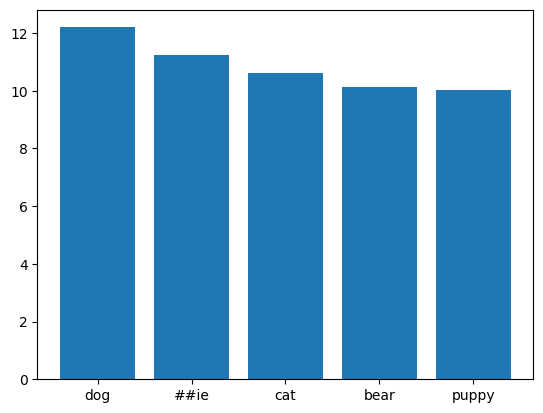

In [12]:
import matplotlib.pyplot as plt

plt.bar(words, top.values.detach().numpy())

Wed≈Çug modelu najbardziej prawdopodobnym uzupe≈Çnieniem brakujƒÖcego wyrazu jest `dog` (a nie `fox`). Nieco zaskakujƒÖcy mo≈ºe byƒá¬†drugi wyraz `##ie`, ale po dodaniu go do istniejƒÖcego tekstu otrzymamy zdanie: "The quick brownie jumps over the lazy dog", kt√≥re r√≥wnie≈º wydaje siƒô¬†sensowne (choƒá¬†nieco zaskakujƒÖce).

## Zadanie 2 (1.5 punkty)

WykorzystujƒÖc model `allegro/herbert-base-cased` zaproponuj zdania z jednym brakujƒÖcym wyrazem, weryfikujƒÖce zdolno≈õƒá tego modelu do:
* odmiany przez polskie przypadki,
* uwzglƒôdniania d≈Çugodystansowych zwiƒÖzk√≥w w tek≈õcie,
* reprezentowania wiedzy o ≈õwiecie.

Dla ka≈ºdego problemu wymy≈õl po 3 zdania sprawdzajƒÖce i wy≈õwietl predykcjƒô dla 5 najbardziej prawdopodobnych wyraz√≥w.

Mo≈ºesz wykorzystaƒá kod z funkcji `plot_words`, kt√≥ry u≈Çatwi Ci wy≈õwietlanie wynik√≥w. Zweryfikuj r√≥wnie≈º jaki token maskujƒÖcy wykorzystywany jest w tym modelu. Pamiƒôtaj r√≥wnie≈º o za≈Çadowaniu modelu `allegro/herbert-base-cased`.

Oce≈Ñ zdolno≈õci modelu w zakresie wskazanych zada≈Ñ.

<s>|Katarzyna</w>|<mask>|piƒôkny</w>|obraz</w>|.</w>|</s>


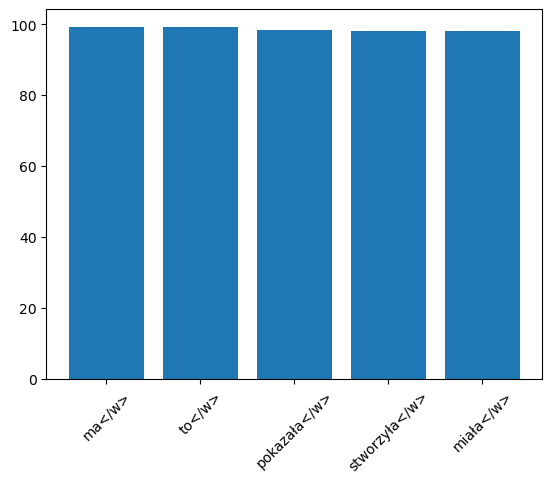

<s>|To</w>|stworzenie</w>|to</w>|by≈Ç</w>|kot</w>|.</w>|Pomimo</w>|tego</w>|,</w>|≈ºe</w>|by≈Ço</w>|ono</w>|z</w>|innego</w>|wymiaru</w>|,</w>|nadal</w>|by≈Ço</w>|<mask>|.</w>|</s>


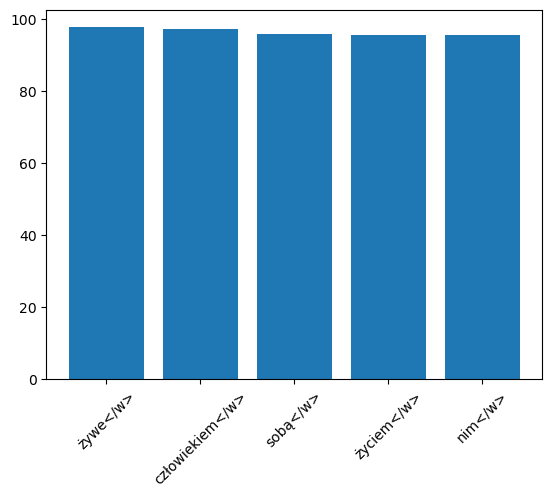

<s>|Ze</w>|wszystkich</w>|pa≈Ñstw</w>|na</w>|≈õwiecie</w>|<mask>|jest</w>|najwiƒôkszym</w>|ekspor|terem</w>|pota|su</w>|.</w>|</s>


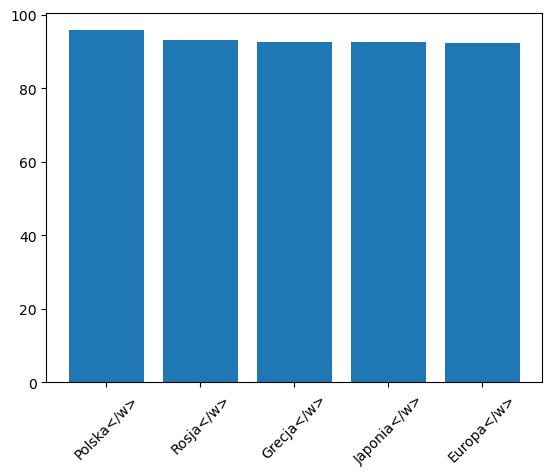

<s>|Woda</w>|zama|rza</w>|poni≈ºej</w>|<mask>|stopni</w>|Cel|ci|usza</w>|.</w>|</s>


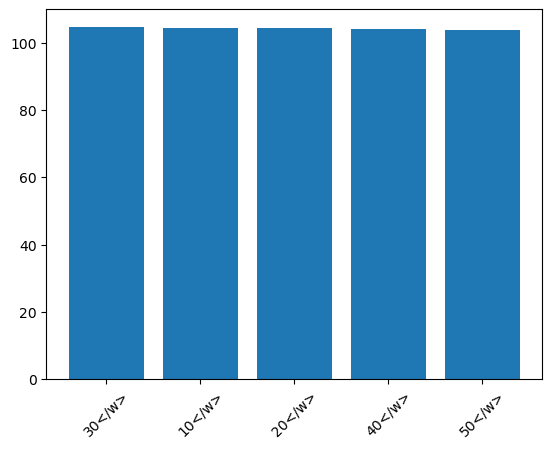

In [13]:
def plot_words(sentence, word_model, word_tokenizer, mask="[MASK]"):
    sentence = word_tokenizer.encode(sentence, return_tensors="pt")
    tokens = word_tokenizer.convert_ids_to_tokens(list(sentence[0]))
    print("|".join(tokens))
    target = word_model(sentence)
    top = torch.topk(target.logits[0][tokens.index(mask)], 5)
    words = word_tokenizer.convert_ids_to_tokens(top.indices)
    plt.xticks(rotation=45)
    plt.bar(words, top.values.detach().numpy())
    plt.show()

tokenizer2 = AutoTokenizer.from_pretrained("allegro/herbert-base-cased")
model2 = AutoModelForMaskedLM.from_pretrained("allegro/herbert-base-cased")
plot_words("Katarzyna <mask> piƒôkny obraz.", model2, tokenizer2, "<mask>")


plot_words("To stworzenie to by≈Ç kot. Pomimo tego, ≈ºe by≈Ço ono z innego wymiaru, nadal by≈Ço <mask>.", model2, tokenizer2,  "<mask>")
plot_words("Ze wszystkich pa≈Ñstw na ≈õwiecie <mask> jest najwiƒôkszym eksporterem potasu.", model2, tokenizer2,  "<mask>")


plot_words("Woda zamarza poni≈ºej <mask> stopni Celciusza.", model2, tokenizer2,  "<mask>")


# Klasyfikacja tekstu

Pierwszym zadaniem, kt√≥re zrealizujemy korzystajƒÖc z modelu HerBERT bƒôdzie klasyfikacja tekstu. Bƒôdzie to jednak do≈õƒá nietypowe zadanie. O ile oczekiwanym wynikiem jest klasyfikacja binarna, czyli do≈õƒá popularny typ klasyfikacji, o tyle dane wej≈õciowe sƒÖ nietypowe, gdy≈º sƒÖ to pary: `(pytanie, kontekst)`. Celem algorytmu jest okre≈õlenie, czy na zadane pytanie mo≈ºna odpowiedzieƒá na podstawie informacji znajdujƒÖcych siƒô w kontek≈õcie.

Model tego rodzaju jest nietypowy, poniewa≈º jest to zadanie z zakresu klasyfikacji par tekst√≥w, ale my potraktujemy je jak zadanie klasyfikacji jednego tekstu, oznaczajƒÖc jedynie fragmenty tekstu jako `Pytanie:` oraz `Kontekst:`. Wykorzystamy tutaj zdolno≈õƒá modeli transformacyjnych do automatycznego nauczenia siƒô tego rodzaju znacznik√≥w, przez co proces przygotowania danych bƒôdzie bardzo uproszczony.

Zbiorem danych, kt√≥ry wykorzystamy do treningu i ewaluacji modelu bƒôdzie PoQUAD - zbi√≥r inspirowany angielskim [SQuADem](https://rajpurkar.github.io/SQuAD-explorer/), czyli zbiorem zawierajƒÖcym ponad 100 tys. pyta≈Ñ i odpowiadajƒÖcych im odpowiedzi. Zbi√≥r ten powsta≈Ç niedawno i jest jeszcze rozbudowywany. Zawiera on pytania, odpowiedzi oraz konteksty, na podstawie kt√≥rych mo≈ºna udzieliƒá odpowiedzi.

W dalszej czƒô≈õci laboratorium skoncentrujemy siƒô na problemie odpowiadania na pytania.

## Przygotowanie danych do klasyfikacji

Przygotowanie danych rozpoczniemy od sklonowania repozytorium zawierajƒÖcego pytania i odpowiedzi.

In [14]:
from datasets import load_dataset

dataset = load_dataset("clarin-pl/poquad")

Sprawd≈∫my co znajduje siƒô w zbiorze danych.

In [15]:
dataset

DatasetDict({
    train: Dataset({
        features: ['id', 'title', 'context', 'question', 'answers'],
        num_rows: 46187
    })
    validation: Dataset({
        features: ['id', 'title', 'context', 'question', 'answers'],
        num_rows: 5764
    })
})

Zbi√≥r danych jest podzielony na dwie czƒô≈õci: treningowƒÖ i walidacyjnƒÖ. Rozmiar czƒô≈õci treningowej to ponad 46 tysiƒôcy pyta≈Ñ i odpowiedzi, natomiast czƒô≈õci walidacyjnej to ponad 5 tysiƒôcy pyta≈Ñ i odpowiedzi.

Dane zbioru przechowywane sƒÖ w plikach `poquad_train.json` oraz `poquad_dev.json`. Dostarczenie podzia≈Çu na te grupy danych jest bardzo czƒôstƒÖ praktykƒÖ w przypadku publicznych, du≈ºych zbior√≥w danych, gdy≈º umo≈ºliwia por√≥wnywanie r√≥≈ºnych modeli, korzystajƒÖc z dok≈Çadnie takiego samego zestawu danych. Prawdopodobnie istnieje r√≥wnie≈º zbi√≥r `poquad_test.json`, kt√≥ry jednak nie jest udostƒôpniany publicznie. Tak jest w przypadku SQuADu - tw√≥rcy zbioru automatycznie ewaluujƒÖ dostarczane modele, ale nie udstoƒôpniaja¬†zbioru testowego. Dziƒôki temu trudniej jest nadmiernie dopasowaƒá model do danych testowych.

Struktura ka≈ºdej z dostƒôpnych czƒô≈õci jest taka sama. Zgodnie z powy≈ºszƒÖ informacjƒÖ zawiera ona nastƒôpujƒÖce elementy:
* `id` - identyfikator pary: pytanie - odpowied≈∫,
* `title` - tytu≈Ç artyku≈Çu z Wikipedii, na podstawie kt√≥rego utworzono parƒô,
* `context` - fragment tre≈õci artyku≈Çu z Wikipedii, zawierajƒÖcy odpowied≈∫ na pytanie,
* `question` - pytanie,
* `answers` - odpowiedzi.

Mo≈ºemy wy≈õwietliƒá kilka poczƒÖkotwych wpis√≥w czƒô≈õci treningowej:

In [16]:
dataset['train']['question'][:5]

['Co by≈Ço powodem powr√≥cenia konceptu porozumieniu monachijskiego?',
 'Pomiƒôdzy jakimi stronami odby≈Ço siƒô zgromadzenie w sierpniu 1942 roku?',
 'O co ubiegali siƒô polscy przedstawiciele podczas spotkania z sierpnia 1942 roku?',
 "Kt√≥ry z dyplomat√≥w sprzeciwi≈Ç siƒô konceptowi konfederacji w listopadzie '42?",
 'Kiedy oficjalnie dosz≈Ço do zawarcia porozumienia?']

In [17]:
dataset['train']['answers'][:5]

[{'text': ['wymianƒÖ list√≥w Ripka ‚Äì Stro≈Ñski'], 'answer_start': [117]},
 {'text': ['E. Bene≈°a i J. Masaryka z jednej a W≈Ç. Sikorskiego i E. Raczy≈Ñskiego'],
  'answer_start': [197]},
 {'text': ['podpisanie uk≈Çadu konfederacyjnego'], 'answer_start': [315]},
 {'text': ['E. Bene≈°'], 'answer_start': [558]},
 {'text': ['20 listopada 1942'], 'answer_start': [691]}]

Niestety, autorzy zbioru danych, pomimo tego, ≈ºe dane te znajdujƒÖ siƒô w ≈∫r√≥d≈Çowym zbiorze danych, nie udostƒôpniajƒÖ dw√≥ch wa≈ºnych informacji: o tym, czy mo≈ºna odpowiedzieƒá na dane pytanie oraz jak brzmi generatywna odpowied≈∫ na pytanie. Dlatego p√≥ki nie zostanie to naprawione, bƒôdziemy dalej pracowƒÖƒá z oryginalnymi plikami zbioru danych, kt√≥re dostƒôpne sƒÖ na stronie opisujƒÖcej zbi√≥r danych: https://huggingface.co/datasets/clarin-pl/poquad/tree/main

Pobierz manualnie zbiory `poquad-dev.json` oraz `poquad-train.json`.

!wget https://huggingface.co/datasets/clarin-pl/poquad/raw/main/poquad-dev.json
!wget https://huggingface.co/datasets/clarin-pl/poquad/resolve/main/poquad-train.json

Dla bezpiecze≈Ñstwa, je≈õli korzystamy z Google drive, to przeniesiemy pliki do naszego dysku:

!mkdir gdrive/MyDrive/poquad
!mv poquad-dev.json gdrive/MyDrive/poquad
!mv poquad-train.json gdrive/MyDrive/poquad

!head -30 gdrive/MyDrive/poquad/poquad-dev.json

Struktura pliku odpowiada strukturze danych w zbiorze SQuAD. Dane umieszczone sƒÖ w kluczu `data` i podzielone na krotki odpowiadajƒÖce pojedynczym artyku≈Çom Wikipedii. W ramach artyku≈Çu mo≈ºe byƒá wybranych jeden lub wiƒôcej paragraf√≥w, dla kt√≥rych w kluczu `qas` pojawiajƒÖ siƒô pytania (`question`), flaga `is_impossible`, wskazujace czy mo≈ºna odpowiedzieƒá na pytanie oraz odpowiedzi (o ile nie jest ustawiona flaga `is_impossible`). Odpowiedzi mo≈ºe byƒá wiele i sk≈ÇadajƒÖ siƒô one z tre≈õci odpowiedzi (`text`) traktowanej jako fragment kontekstu, a tak≈ºe naturalnej odpowiedzi na pytanie (`generative_answer`).

Taki podzia≈Ç mo≈ºe wydawaƒá siƒô dziwny, ale zbi√≥r SQuAD zawiera tylko odpowiedzi pierwszego rodzaju. Wynika to z faktu, ≈ºe w jƒôzyku angielskim fragment tekstu bƒôdzie czƒôsto stanowi≈Ç dobrƒÖ odpowied≈∫ na pytanie (oczywi≈õcie z wyjƒÖtkiem pyta≈Ñ dla kt√≥rych odpowied≈∫ to `tak` lub `nie`).

Natomiast ten drugi typ odpowiedzi jest szczeg√≥lnie przydatny dla jƒôzyka polskiego, poniewa≈º czƒôsto odpowied≈∫ chcemy syntaktycznie dostosowaƒá do pytania, co jest niemo≈ºliwe, je≈õli odpowied≈∫ wskazywana jest jako fragment kontekstu.
W sytuacji, w kt√≥rej odpowiedzi by≈Çy okre≈õlane w spos√≥b automatyczny, sƒÖ one oznaczone jako `plausible_answers`.

Zaczniemy od wczytania danych i wy≈õwietlenia podstawowych statystyk dotyczƒÖcych ilo≈õci artyku≈Ç√≥w oraz przypisanych do nich pyta≈Ñ.

In [4]:
import json

# Adjust for your needs
path = "."

with open(path + "/poquad-train.json", encoding="utf8") as input:
    train_data = json.loads(input.read())["data"]

print(f"Train data articles: {len(train_data)}")

with open(path +"/poquad-dev.json", encoding="utf8") as input:
    dev_data = json.loads(input.read())["data"]

print(f"Dev data articles: {len(dev_data)}")

print(f"Train questions: {sum([len(e['paragraphs'][0]['qas']) for e in train_data])}")
print(f"Dev questions: {sum([len(e['paragraphs'][0]['qas']) for e in dev_data])}")

Train data articles: 8553
Dev data articles: 1402
Train questions: 41577
Dev questions: 6809


Poniewa≈º w pierwszym problemie chcemy stwierdziƒá, czy na pytanie mo≈ºna udzieliƒá odpowiedzi na podstawie kontekstu, po≈ÇƒÖczymy wszystkie konteksty w jednƒÖ tablicƒô, aby m√≥c losowaƒá z niej dane negatywne, gdy≈º liczba pyta≈Ñ nie posiadajƒÖcych odpowiedzi jest stosunkowo ma≈Ça, co prowadzi≈Çoby utworzenia niezbalansowanego zbioru.

In [5]:
all_contexts = [e["paragraphs"][0]["context"] for e in train_data] + [
    e["paragraphs"][0]["context"] for e in dev_data
]

W kolejnym kroku zamieniamy dane w formacie JSON na reprezentacjƒô zgodnƒÖ z przyjƒôtym za≈Ço≈ºeniem.
Chcemy by kontekst oraz pytanie wystƒôpowa≈Çy obok siebie i ka≈ºdy z element√≥w by≈Ç sygnalizowany wyra≈ºeniem: `Pytanie:` i `Kontekst:`. Tre≈õƒá klasyfikowanego tekstu przyporzƒÖdkowujemy do klucza `text`, natomiast klasƒô do klucza `label`, gdy≈º takie sƒÖ oczekiwanie biblioteki Transformer.

Pytania, kt√≥re majƒÖ ustawinƒÖ flagƒô `is_impossible` na `True` trafiajƒÖ wprost do przekszta≈Çconego zbioru. Dla pyta≈Ñ, kt√≥re posiadajƒÖ odpowied≈∫, dodatkowo losowany jest jeden kontekst, kt√≥ry stanowi negatywny przyk≈Çad. Weryfikujemy tylko, czy kontekst ten nie pokrywa siƒô z kontekstem, kt√≥ry przypisany by≈Ç do pytania. Nie przeprowadzamy bardziej zaawansowanych analiz, kt√≥re pomog≈Çyby wylkuczyƒá sytuacjƒô, w kt√≥rej inny kontekst r√≥wnie≈º zawiera odpowied≈∫ na pytanie, gdy≈º prawdopodobie≈Ñstwo wylosowania takiego kontekstu jest bardzo ma≈Çe.

Na ko≈Ñcu wy≈õwietlamy statystyki utworzonego zbioru danych.

In [6]:
import random


tuples = [[], []]

for idx, dataset in enumerate([train_data, dev_data]):
    for data in dataset:
        context = data["paragraphs"][0]["context"]
        for question_answers in data["paragraphs"][0]["qas"]:
            question = question_answers["question"]
            if question_answers["is_impossible"]:
                tuples[idx].append(
                    {
                        "text": f"Pytanie: {question} Kontekst: {context}",
                        "label": 0,
                    }
                )
            else:
                tuples[idx].append(
                    {
                        "text": f"Pytanie: {question} Kontekst: {context}",
                        "label": 1,
                    }
                )
                while True:
                    negative_context = random.choice(all_contexts)
                    if negative_context != context:
                        tuples[idx].append(
                            {
                                "text": f"Pytanie: {question} Kontekst: {negative_context}",
                                "label": 0,
                            }
                        )
                        break

train_tuples, dev_tuples = tuples
print(f"Total count in train/dev: {len(train_tuples)}/{len(dev_tuples)}")
print(
    f"Positive count in train/dev: {sum([e['label'] for e in train_tuples])}/{sum([e['label'] for e in dev_tuples])}"
)

Total count in train/dev: 75605/12372
Positive count in train/dev: 34028/5563


Widzimy, ≈ºe uzyskane zbiory danych cechujƒÖ siƒô do≈õƒá¬†dobrym zbalansowaniem.

DobrƒÖ praktykƒÖ po wprowadzeniu zmian w zbiorze danych, jest wy≈õwietlenie kilku przyk≈Çadowych punkt√≥w danych, w celu wykrycia ewentualnych b≈Çƒôd√≥w, kt√≥re powsta≈Çy na etapie konwersji zbioru. Pozwala to uniknƒÖƒá nieprzyjemnych niespodzianek, np. stworzenie identycznego zbioru danych testowych i treningowych.

In [7]:
print(train_tuples[0:1])
print(dev_tuples[0:1])

[{'text': 'Pytanie: Co by≈Ço powodem powr√≥cenia konceptu porozumieniu monachijskiego? Kontekst: Projekty konfederacji zaczƒô≈Çy siƒô za≈Çamywaƒá 5 sierpnia 1942. Ponownie wr√≥ci≈Ça kwestia monachijska, co uaktywni≈Ço siƒô wymianƒÖ list√≥w Ripka ‚Äì Stro≈Ñski. Natomiast 17 sierpnia 1942 dosz≈Ço do spotkania E. Bene≈°a i J. Masaryka z jednej a W≈Ç. Sikorskiego i E. Raczy≈Ñskiego z drugiej strony. Polscy dyplomaci zaproponowali podpisanie uk≈Çadu konfederacyjnego. W nastƒôpnym miesiƒÖcu, tj. 24 wrze≈õnia, strona polska przes≈Ça≈Ça na rƒôce J. Masaryka projekt deklaracji o przysz≈Çej konfederacji obu pa≈Ñstw. Strona czechos≈Çowacka projekt przyjƒô≈Ça, lecz ju≈º w listopadzie 1942 E. Bene≈° podwa≈ºy≈Ç ideƒô konfederacji. W zamian zaproponowano zawarcie uk≈Çadu sojuszniczego z PolskƒÖ na 20 lat (formalnie nastƒÖpi≈Ço to 20 listopada 1942).', 'label': 1}]
[{'text': 'Pytanie: Czym sƒÖ pisma rabiniczne? Kontekst: Pisma rabiniczne ‚Äì w tym Miszna ‚Äì stanowiƒÖ kompilacjƒô poglƒÖd√≥w r√≥≈ºnych 

Poniewa≈º mamy nowe zbiory danych, mo≈ºemy opakowaƒá je w klasy u≈ÇatwiajƒÖce manipulowanie nimi. Ma to szczeg√≥lne znaczenie w kontek≈õcie szybkiej tokenizacji tych danych, czy p√≥≈∫niejszego szybkiego wczytywania wcze≈õniej utworzonych zbior√≥w danych.

W tym celu wykorzystamy bibliotekƒô `datasets`. Jej kluczowymi klasami sƒÖ `Dataset` reprezentujƒÖcy jeden z podzbior√≥w zbioru danych (np. podzbi√≥r testowy) oraz `DatasetDict`, kt√≥ry ≈ÇƒÖczy wszystkie podzbiory w jeden obiekt, kt√≥rym mo≈ºemy manipulowaƒá w ca≈Ço≈õci. (Gdyby autorzy udostƒôpnili odpowiedni skrypt ze zbiorem, mogliby≈õmy wykorzystaƒá tƒô bibliotekƒô bez dodatkowej pracy).

Dodatkowo zapiszemy tak utworzony zbi√≥r danych na dysku. Je≈õli p√≥≈∫niej chcieliby≈õmy wykorzystaƒá stworzony zbi√≥r danych, to mo≈ºemy to zrobiƒá za pomocƒÖ komendy `load_dataset`.

In [8]:
from datasets import Dataset, DatasetDict

train_dataset = Dataset.from_list(train_tuples)
dev_dataset = Dataset.from_list(dev_tuples)
datasets = DatasetDict({"train": train_dataset, "dev": dev_dataset})
datasets.save_to_disk(path + "/question-context-classification")

Saving the dataset (0/1 shards):   0%|          | 0/75605 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/12372 [00:00<?, ? examples/s]

Dane tekstowe przed przekazaniem do modelu wymagajƒÖ tokenizacji (co widzieli≈õmy ju≈º wcze≈õniej). Efektywne wykonanie tokenizacji na ca≈Çym zbiorze danych u≈Çatwione jest przez obiekt `DatasetDict`. Definiujemy funkcjƒô `tokenize_function`, kt√≥ra korzystajƒÖc z za≈Çadowanego tokenizera, zamienia tekst na identyfikatory.

W wywo≈Çaniu u≈ºywamy opcji `padding` - uzupe≈Çniamy wszystkie teksty do d≈Çugo≈õci najd≈Çu≈ºszego tekstu. Dodatkowo, je≈õli kt√≥ry≈õ tekst wykracza poza maksymalnƒÖ d≈Çugo≈õƒá obs≈ÇugiwanƒÖ przez model, to jest on przycinany (`truncation=True`).

Tokenizacjƒô aplikujemy do zbioru z wykorzystaniem przetwarzania batchowego (`batched=True`), kt√≥re pozwala na szybsze stokenizowanie du≈ºego zbioru danych.

In [9]:
from transformers import AutoTokenizer

pl_tokenizer = AutoTokenizer.from_pretrained("allegro/herbert-base-cased")

def tokenize_function(examples):
    return pl_tokenizer(examples["text"], padding="max_length", truncation=True)


tokenized_datasets = datasets.map(tokenize_function, batched=True)
tokenized_datasets["train"]

Map:   0%|          | 0/75605 [00:00<?, ? examples/s]

Map:   0%|          | 0/12372 [00:00<?, ? examples/s]

Dataset({
    features: ['text', 'label', 'input_ids', 'token_type_ids', 'attention_mask'],
    num_rows: 75605
})

Stokenizowane dane zawierajƒÖ dodatkowe pola: `input_ids`, `token_type_ids` oraz `attention_mask`. Dla nas najwa≈ºniejsze jest pole `input_ids`, kt√≥re zawiera identyfikatory token√≥w. Pozosta≈Çe dwa pola sƒÖ ustawione na identyczne warto≈õci (wszystkie tokeny majƒÖ ten sam typ, maska atencji zawiera wszystkie niezerowe tokeny), wiƒôc nie sƒÖ one dla nas zbyt interesujƒÖce. Zobaczmy pola `text`, `input_ids` oraz `attention_mask` dla pierwszego przyk≈Çadu:

In [24]:
example = tokenized_datasets["train"][0]
print(example["text"])
print(example["input_ids"])
print(example["attention_mask"])

Pytanie: Co by≈Ço powodem powr√≥cenia konceptu porozumieniu monachijskiego? Kontekst: Projekty konfederacji zaczƒô≈Çy siƒô za≈Çamywaƒá 5 sierpnia 1942. Ponownie wr√≥ci≈Ça kwestia monachijska, co uaktywni≈Ço siƒô wymianƒÖ list√≥w Ripka ‚Äì Stro≈Ñski. Natomiast 17 sierpnia 1942 dosz≈Ço do spotkania E. Bene≈°a i J. Masaryka z jednej a W≈Ç. Sikorskiego i E. Raczy≈Ñskiego z drugiej strony. Polscy dyplomaci zaproponowali podpisanie uk≈Çadu konfederacyjnego. W nastƒôpnym miesiƒÖcu, tj. 24 wrze≈õnia, strona polska przes≈Ça≈Ça na rƒôce J. Masaryka projekt deklaracji o przysz≈Çej konfederacji obu pa≈Ñstw. Strona czechos≈Çowacka projekt przyjƒô≈Ça, lecz ju≈º w listopadzie 1942 E. Bene≈° podwa≈ºy≈Ç ideƒô konfederacji. W zamian zaproponowano zawarcie uk≈Çadu sojuszniczego z PolskƒÖ na 20 lat (formalnie nastƒÖpi≈Ço to 20 listopada 1942).
[0, 14142, 1335, 3407, 2404, 14736, 6491, 4081, 6743, 2213, 19824, 25437, 3096, 13875, 1550, 2922, 8413, 1335, 46771, 2152, 17914, 10278, 2022, 11314, 37410, 1008, 

Mo≈ºem te≈º sprawdziƒá, jak zosta≈Ç stokenizowany pierwszy przyk≈Çad:

In [25]:
print("|".join(pl_tokenizer.convert_ids_to_tokens(list(example["input_ids"]))))


<s>|Pytanie</w>|:</w>|Co</w>|by≈Ço</w>|powodem</w>|powr√≥|cenia</w>|koncep|tu</w>|porozumieniu</w>|mona|chi|jskiego</w>|?</w>|Kon|tekst</w>|:</w>|Projekty</w>|kon|federacji</w>|zaczƒô≈Çy</w>|siƒô</w>|za≈Ça|mywaƒá</w>|5</w>|sierpnia</w>|1942</w>|.</w>|Ponownie</w>|wr√≥ci≈Ça</w>|kwestia</w>|mona|chi|jska</w>|,</w>|co</w>|u|akty|wni|≈Ço</w>|siƒô</w>|wymianƒÖ</w>|list√≥w</w>|Ri|pka</w>|‚Äì</w>|Stro|≈Ñski</w>|.</w>|Natomiast</w>|17</w>|sierpnia</w>|1942</w>|dosz≈Ço</w>|do</w>|spotkania</w>|E</w>|.</w>|Bene|≈°|a</w>|i</w>|J</w>|.</w>|Ma|sar|yka</w>|z</w>|jednej</w>|a</w>|W|≈Ç</w>|.</w>|Sikorskiego</w>|i</w>|E</w>|.</w>|Ra|czy≈Ñskiego</w>|z</w>|drugiej</w>|strony</w>|.</w>|Polscy</w>|dyploma|ci</w>|zaproponowali</w>|podpisanie</w>|uk≈Çadu</w>|kon|fede|ra|cyjnego</w>|.</w>|W</w>|nastƒôpnym</w>|miesiƒÖcu</w>|,</w>|tj</w>|.</w>|24</w>|wrze≈õnia</w>|,</w>|strona</w>|polska</w>|przes≈Ç|a≈Ça</w>|na</w>|rƒôce</w>|J</w>|.</w>|Ma|sar|yka</w>|projekt</w>|deklaracji</w>|o</w>|przysz≈Çej</w>|kon|federacj

Widzimy, ≈ºe wyrazy podzielone sƒÖ sensownie, a na ko≈Ñcu tekstu pojawiajƒÖ siƒô tokeny wype≈Çnienia (PAD). Oznacza to, ≈ºe zdanie zosta≈Ço poprawnie skonwertowane.

Mo≈ºemy sprawdziƒá, ≈ºe liczba token√≥w w polu `inut_ids`, kt√≥re sƒÖ r√≥≈ºne od tokenu wype≈Çnienia (`[PAD] = 1`) oraz maska atencji, majƒÖ tƒô¬†samƒÖ d≈Çugo≈õƒá:

In [26]:
print(len([e for e in example["input_ids"] if e != 1]))
print(len([e for e in example["attention_mask"] if e == 1]))

169
169


MajƒÖc pewno≈õƒá, ≈ºe przygotowane przez nas dane sƒÖ prawid≈Çowe, mo≈ºemy przystƒÖpiƒá do procesu uczenia modelu.

## Trening z u≈ºyciem transformers√≥w

Biblioteka Transformes pozwala na za≈Çadowanie tego samego modelu dostosowanego do r√≥≈ºnych zada≈Ñ. Wcze≈õniej u≈ºywali≈õmy modelu HerBERT do predykcji brakujƒÖcego wyrazu. Teraz za≈Çadujemy ten sam model, ale z innƒÖ "g≈ÇowƒÖ". Zostanie u≈ºyta warstwa, kt√≥ra pozwala na klasyfikacjƒô ca≈Çego tekstu do jednej z n-klas. Wystarczy podmieniƒá klasƒô, za pomocƒÖ kt√≥rej ≈Çadujemy model na `AutoModelForSequenceClassification`:

In [27]:
from transformers import AutoModelForSequenceClassification

model = AutoModelForSequenceClassification.from_pretrained(
    "allegro/herbert-base-cased", num_labels=2
)

model

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at allegro/herbert-base-cased and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(50000, 768, padding_idx=1)
      (position_embeddings): Embedding(514, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12,

Komunikat diagnostyczny, kt√≥ry pojawia siƒô przy ≈Çadowaniu modelu jest zgodny z naszymi oczekiwaniami. Model HerBERT by≈Ç trenowany do predykcji token√≥w, a nie klasyfikacji tekstu. Dlatego te≈º ostatnia warstwa (`classifier.weight` oraz `classifier.bias`) jest inicjowana losowo. Wagi zostanƒÖ ustalone w trakcie procesu fine-tuningu modelu.

Je≈õli por√≥wnamy wersje modeli za≈Çadowane za pomocƒÖ r√≥≈ºnych klas, to zauwa≈ºymy, ≈ºe r√≥≈ºniƒÖ siƒô one tylko na samym ko≈Ñcu. Jest to zgodne z za≈Ço≈ºeniami procesu pre-treningu i fine-tuningu. W pierwszy etapie model uczy siƒô zale≈ºno≈õci w jƒôzyku, korzystajƒÖc z zadania maskowanego modelowania jƒôzyka (Masked Language Modeling). W drugim etapie model dostosowywane jest do konkretnego zadania, np. klasyfikacji binarnej tekstu.

Korzystanie z biblioteki Transformers uwalnia nas od manualnego definiowania pƒôtli uczƒÖcej, czy wywo≈Çywania algorytmu wstecznej propagacji b≈Çƒôdu. Trening realizowany jest z wykorzystaniem klasy `Trainer`  (i jej specjlizacji). Argumenty treningu okre≈õlane sƒÖ natomiast w klasie `TrainingArguments`.  Klasy te sƒÖ [bardzo dobrze udokumentowane](https://huggingface.co/docs/transformers/main_classes/trainer#trainer), wiƒôc nie bƒôdziemy omawiaƒá wszystkich mo≈ºliwych opcji.

Najwa≈ºniejsze opcje sƒÖ nastƒôpujƒÖce:
* `output_dir` - katalog do kt√≥rego zapisujemy wyniki,
* `do_train` - wymagamy aby przeprowadzony by≈Ç trening,
* `do_eval` - wymagamy aby przeprowadzona by≈Ça ewaluacja modelu,
* `evaluation_strategy` - okre≈õlenie momentu, w kt√≥rym realizowana jest ewaluacja,
* `evaluation_steps` - okre≈õlenie co ile krok√≥w (krok = przetworzenie 1 batcha) ma byƒá realizowana ewaluacja,
* `per_device_train/evaluation_batch_size` - rozmiar batcha w trakcie treningu/ewaluacji,
* `learning_rate` - szybko≈õƒá uczenia,
* `num_train_epochs` - liczba epok uczenia,
* `logging`... - parametry logowania postƒôp√≥w uczenia,
* `save_strategy` - jak czƒôsto nale≈ºy zapisywaƒá wytrenowany model,
* `fp16/bf16` - u≈ºycie arytmetyki o zmniejszonej dok≈Çadno≈õci, przyspieszajƒÖcej proces uczenia. **UWAGA**: u≈ºycie niekompatybilnej arytmetyki skutkuje niemo≈ºno≈õciƒÖ nauczenia modelu, co jednak nie daje ≈ºadnych innych b≈Çƒôd√≥w lub komunikat√≥w ostrzegawczych.

In [28]:
from transformers import TrainingArguments
import numpy as np

arguments = TrainingArguments(
    output_dir=path + "/output",
    do_train=True,
    do_eval=True,
    evaluation_strategy="steps",
    eval_steps=300,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    learning_rate=5e-05,
    num_train_epochs=1,
    logging_first_step=True,
    logging_strategy="steps",
    logging_steps=50,
    save_strategy="epoch",
    fp16=True,
)

W trakcie treningu bƒôdziemy chcieli zobaczyƒá, czy model poprawnie radzi sobie z postawionym mu problemem. Najlepszym sposobem na podglƒÖdanie tego procesu jest obserwowanie wykres√≥w. Model mo≈ºe raportowaƒá szereg metryk, ale najwa≈ºniejsze dla nas bƒôdƒÖ nastƒôpujƒÖce warto≈õci:
* warto≈õƒá funkcji straty na danych treningowych - je≈õlie nie spada w trakcie uczenia, znaczy to, ≈ºe nasz model nie jest poprawnie skonstruowany lub dane uczƒÖce sƒÖ¬†niepoprawne,
* warto≈õƒá jednej lub wielu metryk uzyskiwanych na zbiorze walidacyjnym - mo≈ºemy ≈õledziƒá warto≈õƒá funkcji straty na zbiorze ewaluacyjnym, ale warto r√≥wnie≈º¬†wy≈õwietlaƒá metryki, kt√≥re da siƒô ≈Çatwiej zinterpretowaƒá; dla klasyfikacji zbalansowanego zbioru danych mo≈ºe to byƒá dok≈Çadno≈õƒá (`accuracy`).

Biblioteka Transformers pozwala w zasadzie na wykorzystanie dowolnej metryki, ale szczeg√≥lnie dobrze wsp√≥≈Çpracuje z metrykami zdefiniowanymi w bibliotece `evaluate` (r√≥wnie≈º autorstwa Huggingface).

Wykorzystanie metryki wymaga od nas zdefiniowania metody, kt√≥ra akceptuje batch danych, kt√≥ry zawieraja predykcje (wektory zwr√≥cone na wyj≈õciu modelu) oraz referencyjne warto≈õci - warto≈õci przechowywane w kluczu `label`. Przed obliczeniem metryki konieczne jest "odcyfrowanie" zwr√≥conych warto≈õci. W przypadku klasyfikacji oznacza to po prostu wybranie najbardziej prawodopodobnej klasy i por√≥wnanie jej z klasƒÖ referencyjnƒÖ.

U≈ºycie konkretnej metryki realizowane jest za pomocƒÖ wywo≈Çania `metric.compute`, kt√≥ra akceptuje predykcje (`predictions`) oraz warto≈õci referencyjne (`references`).

In [29]:
import evaluate

metric = evaluate.load("accuracy")


def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=1)
    return metric.compute(predictions=predictions, references=labels)

Ostatnim krokiem w procesie treningu jest stworzenie obiektu klasy `Trainer`. Akceptuje ona m.in. model, kt√≥ry wykorzystywany jest w treningu, przygotowane argumenty treningu, zbiory do treningu, ewaluacji, czy testowania oraz wcze≈õniej okre≈õlonƒÖ metodƒô do obliczania metryki na danych ewaluacyjnych.

W przetwarzaniu jezyka naturalnego dominujƒÖcym podej≈õciem jest obecnie rozdzielenie procesu treningu na dwa etapy: pre-treining oraz fine-tuning. W pierwszym etapie model trenowany jest w re≈ºimie self-supervised learning (SSL). Wybierane jest zadanie zwiƒÖzane najczƒô≈õciej z modelowaniem jƒôzyka - mo≈ºe to byƒá kauzalne lub maskowane modelowanie jƒôzyka.

W *kauzalnym modelowaniu jƒôzyka* model jƒôzykowy, na podstawie poprzedzajƒÖcych wyraz√≥w okre≈õla prawdopodobie≈Ñstwo wystƒÖpienia kolejnego wyrazu. W *maskowanym modelowaniu jƒôzyka* model jƒôzykowy odgaduje w tek≈õcie czƒô≈õƒá wyraz√≥w, kt√≥ra zosta≈Ça z niego usuniƒôta.

W obu przypadkach dane, na kt√≥rych trenowany jest model nie wymagajƒÖ rƒôcznego oznakowania (tagowaina). Wystarczy jedynie posiadaƒá du≈ºy korpus danych jƒôzykowych, aby wytrenowaƒá model, kt√≥ry dobrze radzi sobie z jednym z tych zada≈Ñ. Model tego rodzaju by≈Ç pokazany na poczƒÖtku laboratorium.

W drugim etapie - fine-tuningu (dostrajaniu modelu) - nastƒôpuje modyfikacja parametr√≥w modelu, w celu rozwiƒÖzania konkretnego zadania. W naszym przypadku pierwszym zadaniem tego rodzaju jest klasyfikacja. Dostroimy zatem model `herbert-base-cased` do zadania klasyfikacji par: pytanie - kontekst.

Wykorzystamy wcze≈õniej utworzone zbiory danych i dodatkowo zmienimy kolejno≈õƒá danych, tak aby uniknƒÖƒá potencjalnego problemu z korelacjƒÖ danych w ramach batcha. Wykorzystujemy do tego wywo≈Çanie `shuffle`.

In [30]:
from transformers import Trainer

trainer = Trainer(
    model=model,
    args=arguments,
    train_dataset=tokenized_datasets["train"].shuffle(seed=42),
    eval_dataset=tokenized_datasets["dev"].shuffle(seed=42),
    compute_metrics=compute_metrics,
)

Zanim uruchomimy trening, za≈Çadujemy jeszcze modu≈Ç TensorBoard. Nie jest to krok niezbƒôdy. TensorBoard to biblioteka, kt√≥ra pozwala na wy≈õwietlanie w trakcie procesu trening warto≈õci, kt√≥re wskazujƒÖ nam, czy model trenuje siƒô poprawnie. W naszym przypadku bƒôdzie to `loss` na danych treningowych, `loss` na danych ewaluacyjnych oraz warto≈õƒá metryki `accuracy`, kt√≥rƒÖ zdefiniowali≈õmy wcze≈õniej. Wywo≈Çanie tej kom√≥rki na poczƒÖtku nie da ≈ºadnego efektu, ale mo≈ºna jƒÖ od≈õwie≈ºaƒá, za pomocƒÖ ikony w menu TensorBoard (ewentualnie w≈ÇƒÖczyƒá automatyczne od≈õwie≈ºanie). Wtedy w miarƒô up≈Çywu treningu bƒôdziemy mieli podglƒÖd, na przebieg procesu oraz osiƒÖgane warto≈õci interesujƒÖcych nas parametr√≥w.

Warto zauwa≈ºyƒá, ≈ºe istenieje szereg innych narzƒôdzi do monitorowania eksperyment√≥w z treningiem sieci. W≈õr√≥d nich du≈ºƒÖ popularno≈õciƒÖ cieszƒÖ siƒô [WanDB](https://wandb.ai/site) oraz [Neptune.AI](https://neptune.ai/). Ich zaletƒÖ jest m.in. to, ≈ºe mo≈ºemy ≈Çatwo archiwizowaƒá przeprowadzone eksperymenty, por√≥wnywaƒá je ze sobƒÖ, analizowaƒá wp≈Çyw hiperparametr√≥w na uzyskane wyniki, itp.

%load_ext tensorboard
%tensorboard --logdir gdrive/MyDrive/poquad/output/runs

Uruchomienie procesu treningu jest ju≈º bardzo proste, po tym jak przygotowali≈õmy wszystkie niezbƒôdne szczeg√≥≈Çy. Wystarczy wywo≈Çaƒá metodƒô `trainer.train()`. Warto mieƒá na uwadze, ≈ºe proces ten bƒôdzie jednak d≈Çugotrwa≈Çy - jedna epoka treningu na przygotowanych danych bƒôdzie trwa≈Ça ponad 1 godzinƒô. Na szczƒô≈õcie, dziƒôki ustawieniu ewaluacji co 300 krok√≥w, bƒôdziemy mogli obserwowaƒá jak model radzie sobie z postawionym przed nim problemem na danych ewaluacyjnych.

In [31]:
trainer.train()

TrainOutput(global_step=4726, training_loss=0.2841943945866543, metrics={'train_runtime': 11863.858, 'train_samples_per_second': 6.373, 'train_steps_per_second': 0.398, 'total_flos': 1.98925113404928e+16, 'train_loss': 0.2841943945866543, 'epoch': 1.0})

In [ ]:
trainer.save_model("./poquad/herbert-base-cased-question-classifier")

## Zadanie 3 (1 punkt)

Wybierz losowƒÖ stronƒô z Wikipedii i skopiuj fragment tekstu do Notebook. Zadaj 3 pytania, na kt√≥re mo≈ºna udzieliƒá odpowied≈∫ na podstawie tego fragmentu tekstu oraz 3 pytania, na kt√≥re nie mo≈ºna udzieliƒá odpowiedzi. Oce≈Ñ jako≈õƒá predykcji udzielanych przez model.

In [39]:
# your_code
from transformers import pipeline

classifier = pipeline(
        task="text-classification",
        model=model,
        tokenizer=pl_tokenizer,
        device=0,
    )
pytanie1 = "Kto kierowa≈Ç zespo≈Çem architekt√≥w budowƒÖ parku?"
pytanie2 = "W kt√≥rym roku park powsta≈Ç?"
pytanie3 = "Jak du≈ºy by≈Ç park?"

kontekst = "Jednym z g≈Ç√≥wnych inicjator√≥w powstania Parku by≈Ç gen. Jerzy Ziƒôtek. Decyzja o budowie tej najwiƒôkszej inwestycji ekologicznej na G√≥rnym ≈ölƒÖsku zapad≈Ça na posiedzeniu Wojew√≥dzkiej Rady Narodowej w Katowicach. Obszar inwestycji obejmowa≈Ç w 75% zdewastowane tereny poprzemys≈Çowe: ha≈Çdy, odpady pog√≥rnicze, biedaszyby, zapadliska, bagna, wysypiska, a tak≈ºe nieu≈ºytki rolnicze o powierzchni oko≈Ço 640 ha na terytorium Chorzowa i Katowic. Z powodu ma≈Çej przydatno≈õci miejscowych kwa≈õnych gleb bielicowych na teren obecnego Parku przywieziono 3,5 miliona m¬≥ ziemi i dowieziono 0,5 miliona m¬≥ gleb pr√≥chnicznych i torfu. \
Budowa by≈Ça realizowana w du≈ºej czƒô≈õci poprzez czyny spo≈Çeczne. Zbierano r√≥wnie≈º datki pieniƒô≈ºne i prowadzono sprzeda≈º kartonik√≥w filatelistycznych z dop≈ÇatƒÖ na budowƒô WPKiW. Podstawowym za≈Ço≈ºeniem, jakim kierowa≈Ç siƒô przy projektowaniu Parku zesp√≥≈Ç architekt√≥w kierowany przez prof. W≈Çadys≈Çawa Niemirskiego, by≈Ço podzielenie go na dwie strefy przy wykorzystaniu istniejƒÖcego uk≈Çadu topograficznego. CentralnƒÖ czƒô≈õƒá parku zaprojektowano wiƒôc jako teren o charakterze le≈õnym, poprzecinany sieciƒÖ dr√≥g, alejek i trakt√≥w pieszych majƒÖcych sprzyjaƒá wyciszeniu, biernemu wypoczynkowi oraz aktywnej rekreacji ruchowej. Pozosta≈Ça czƒô≈õƒá parku, ok. 13 ha, zaprojektowana zosta≈Ça jako tereny o charakterze kulturalno-rekreacyjnym oraz tereny sprzyjajƒÖce czynnemu wypoczynkowi, gdzie mia≈Çy zostaƒá wybudowane dodatkowe atrakcje oraz byƒá organizowane festyny."

input_text = f"Pytanie: {pytanie1} Kontekst: {kontekst}"
predictions = classifier(input_text)
print(predictions)

input_text = f"Pytanie: {pytanie2} Kontekst: {kontekst}"
predictions = classifier(input_text)
print(predictions)

input_text = f"Pytanie: {pytanie3} Kontekst: {kontekst}"
predictions = classifier(input_text)
print(predictions)

[{'label': 'LABEL_1', 'score': 0.8677098155021667}]
[{'label': 'LABEL_1', 'score': 0.7718865275382996}]
[{'label': 'LABEL_1', 'score': 0.9409527778625488}]


Na pytania na kt√≥re mo≈ºna udzieliƒá odpowiedzi model odpowiada poprawnie, natomiast na pytanie na kt√≥re nie mo≈ºna udzieliƒá odpowiedzi model jest dosyƒá pewny, ≈ºe da siƒô odpowiedzieƒá.

# Odpowiadanie na pytania

Drugim problemem, kt√≥rym zajmie siƒô w tym laboratorium jest odpowiadanie na pytania. Zmierzymy siƒô z wariantem tego problemu, w kt√≥rym model sam formu≈Çuje odpowied≈∫, na podstawie pytania i kontekstu, w kt√≥rych znajduje siƒô odpowied≈∫ na pytanie (w przeciwie≈Ñstwie do wariantu, w kt√≥rym model wskazuje lokalizacjƒô odpowiedzi na pytanie).


## Zadanie 4 (1 punkt)

Rozpocznij od przygotowania danych. Wybierzem tylko te pytania, kt√≥re posiadajƒÖ¬†odpowied≈∫ (`is_impossible=False`). Uwzglƒôdnij zar√≥wno pytania *pewne* (pole `answers`) jak i *prawdopodobne* (pole `plausible_answers`). Wynikowy zbi√≥r danych powinien mieƒá identycznƒÖ strukturƒô, jak w przypadku zadania z klasyfikacjƒÖ, ale etykiety zamiast warto≈õci 0 i 1, powinny zawieraƒá odpowied≈∫ na pytanie, a sama nazwa etykiety powinna byƒá zmieniona z `label` na `labels`, w celu odzwierciedlenia faktu, ≈ºe teraz zwracane jest wiele etykiet.

Wy≈õwietl liczbƒô danych (par: pytanie - odpowied≈∫) w zbiorze treningowym i zbiorze ewaluacyjnym.

Opakuj r√≥wnie≈º zbiory w klasy z biblioteki `datasets` i zapisz je na dysku.

In [20]:
import random
from datasets import Dataset, DatasetDict

tuples = [[], []]

for idx, dataset in enumerate([train_data, dev_data]):
    for data in dataset:
        context = data["paragraphs"][0]["context"]
        for question_answers in data["paragraphs"][0]["qas"]:
            question = question_answers["question"]
            if not question_answers["is_impossible"]:
                tuples[idx].append(
                    {
                        "text": f"Pytanie: {question} Kontekst: {context}",
                        "labels": question_answers["answers"][0]['text'],
                    }
                )

train_tuples, dev_tuples = tuples
print(f"Total count in train/dev: {len(train_tuples)}/{len(dev_tuples)}")

datasets = DatasetDict(
    {
        "train": Dataset.from_list(train_tuples),
        "dev": Dataset.from_list(dev_tuples),
    }
)

datasets.save_to_disk("./datasets-question-answering")


Total count in train/dev: 34028/5563


Saving the dataset (0/1 shards):   0%|          | 0/34028 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/5563 [00:00<?, ? examples/s]

In [21]:
datasets = DatasetDict.load_from_disk("./datasets-question-answering")

Zanim przejdziemy do dalszej czƒô≈õci, sprawd≈∫my, czy dane zosta≈Çy poprawnie utworzone. Zweryfikujmy przede wszystkim, czy klucze `text` oraz `label` zawieraja¬†odpowiednie warto≈õci:

In [22]:
print(datasets["train"][0]["text"])
print(datasets["train"][0]["labels"])
print(datasets["dev"][0]["text"])
print(datasets["dev"][0]["labels"])

Pytanie: Co by≈Ço powodem powr√≥cenia konceptu porozumieniu monachijskiego? Kontekst: Projekty konfederacji zaczƒô≈Çy siƒô za≈Çamywaƒá 5 sierpnia 1942. Ponownie wr√≥ci≈Ça kwestia monachijska, co uaktywni≈Ço siƒô wymianƒÖ list√≥w Ripka ‚Äì Stro≈Ñski. Natomiast 17 sierpnia 1942 dosz≈Ço do spotkania E. Bene≈°a i J. Masaryka z jednej a W≈Ç. Sikorskiego i E. Raczy≈Ñskiego z drugiej strony. Polscy dyplomaci zaproponowali podpisanie uk≈Çadu konfederacyjnego. W nastƒôpnym miesiƒÖcu, tj. 24 wrze≈õnia, strona polska przes≈Ça≈Ça na rƒôce J. Masaryka projekt deklaracji o przysz≈Çej konfederacji obu pa≈Ñstw. Strona czechos≈Çowacka projekt przyjƒô≈Ça, lecz ju≈º w listopadzie 1942 E. Bene≈° podwa≈ºy≈Ç ideƒô konfederacji. W zamian zaproponowano zawarcie uk≈Çadu sojuszniczego z PolskƒÖ na 20 lat (formalnie nastƒÖpi≈Ço to 20 listopada 1942).
wymianƒÖ list√≥w Ripka ‚Äì Stro≈Ñski
Pytanie: Czym sƒÖ pisma rabiniczne? Kontekst: Pisma rabiniczne ‚Äì w tym Miszna ‚Äì stanowiƒÖ kompilacjƒô poglƒÖd√≥w r√≥≈ºnych 

Tokenizacja danych dla problemu odpowiadania na pytania jest nieco bardziej problematyczna. W pierwszej kolejno≈õci trzeba wziƒÖƒá pod uwagƒô, ≈ºe dane wynikowe (etykiety), te≈º muszƒÖ podlegaƒá tokenizacji. Realizowane jest to poprzez wywo≈Çanie tokenizera, z opcjƒÖ `text_target` ustawionƒÖ na ≈Ça≈Ñcuch, kt√≥ry ma byƒá stokenizowany.

Ponadto wcze≈õniej nie przejmowali≈õmy siƒô za bardzo tym, czy wykorzystywany model obs≈Çuguje teksty o za≈Ço≈ºonej d≈Çugo≈õci. Teraz jednak ma to du≈ºe znaczenie. Je≈õli u≈ºyjemy modelu, kt√≥ry nie jest w stanie wygenerowaƒá odpowiedzi o oczekiwanej d≈Çugo≈õci, to nie mo≈ºemy oczekiwaƒá, ≈ºe model ten bƒôdzie dawa≈Ç dobre rezultaty dla danych w zbiorze treningowym i testowym.

W pierwszej kolejno≈õci dokonamy wiƒôc tokenizacji bez ogranicze≈Ñ co do d≈Çugo≈õci tekstu. Ponadto, stokenizowane odpowiedzi przypiszemy do klucza `label`. Do tokenizacji u≈ºyjemy tokenizera stowarzyszonego z modelem  `allegro/plt5-base`.


In [24]:
from transformers import AutoTokenizer

plt5_tokenizer = AutoTokenizer.from_pretrained("allegro/plt5-base")


def preprocess_function(examples):
    model_inputs = plt5_tokenizer(examples["text"])
    labels = plt5_tokenizer(text_target=examples["labels"])
    model_inputs["labels"] = labels["input_ids"]
    return model_inputs


tokenized_datasets = datasets.map(preprocess_function, batched=True)

Map:   0%|          | 0/34028 [00:00<?, ? examples/s]

Map:   0%|          | 0/5563 [00:00<?, ? examples/s]

Sprawd≈∫my jak dane wyglƒÖdajƒÖ po tokenizacji:

In [25]:
print(tokenized_datasets["train"][0].keys())
print(tokenized_datasets["train"][0]["input_ids"])
print(tokenized_datasets["train"][0]["labels"])
print(len(tokenized_datasets["train"][0]["input_ids"]))
print(len(tokenized_datasets["train"][0]["labels"]))
example = tokenized_datasets["train"][0]

print("|".join(plt5_tokenizer.convert_ids_to_tokens(list(example["input_ids"]))))
print("|".join(plt5_tokenizer.convert_ids_to_tokens(list(example["labels"]))))

dict_keys(['text', 'labels', 'input_ids', 'attention_mask'])
[21584, 291, 639, 402, 11586, 292, 23822, 267, 1269, 8741, 280, 24310, 42404, 305, 373, 1525, 15643, 291, 2958, 273, 19605, 6869, 271, 298, 2256, 7465, 394, 540, 2142, 259, 17542, 13760, 10331, 9511, 322, 31220, 261, 358, 348, 267, 7243, 430, 470, 271, 39908, 20622, 2178, 18204, 308, 8439, 2451, 259, 1974, 455, 540, 2142, 1283, 272, 994, 525, 259, 15697, 1978, 267, 264, 644, 259, 14988, 19434, 265, 1109, 287, 274, 357, 259, 21308, 264, 525, 259, 35197, 305, 265, 793, 823, 259, 25318, 2750, 4724, 31015, 21207, 4162, 40335, 18058, 259, 274, 4862, 7030, 261, 5269, 259, 658, 497, 261, 6971, 1890, 35042, 267, 266, 3260, 644, 259, 14988, 19434, 1187, 20919, 284, 27584, 19605, 1230, 2555, 259, 12531, 7278, 3845, 8726, 10486, 1187, 10676, 261, 996, 347, 260, 2548, 2142, 525, 259, 15697, 1978, 309, 27648, 31887, 19605, 259, 274, 4931, 36525, 37011, 4162, 10036, 7141, 265, 6340, 266, 465, 346, 269, 3648, 4383, 6704, 294, 465, 567, 2142

Wykorzystywany przez nas model obs≈Çuguje teksty od d≈Çugo≈õci do 512 sub-token√≥w (w zasadzie ograniczenie to, w przeciwie≈Ñstwie do modelu BERT nie wynika z samego modelu, wiƒôc teoretycznie mogliby≈õmy wykorzystywaƒá d≈Çu≈ºsze sekwencje, co jednak prowadzi do nadmiernej konsumpcji pamiƒôci). Konieczne jest zatem sprawdzenie, czy w naszych danych nie ma tekst√≥w o wiƒôkszej d≈Çugo≈õci.

## Zadanie 5 (0.5 punkt)

Stw√≥rz histogramy prezentujƒÖce rozk≈Çad d≈Çugo≈õci (jako liczby token√≥w) tekst√≥w wej≈õciowych (`input_ids`) oraz odpowiedzi (`labels`) dla zbioru treningowego. Zinterpretuj otrzymane wyniki.

<BarContainer object of 1738 artists>

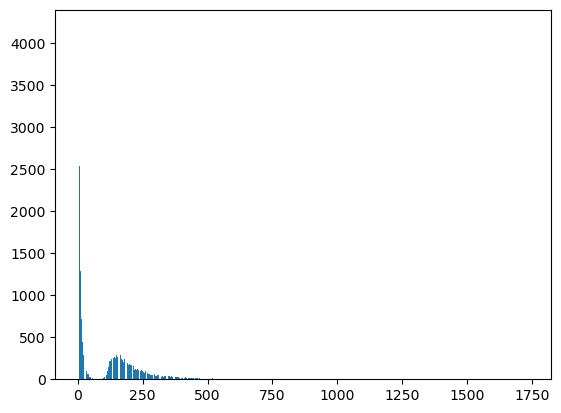

In [28]:
import matplotlib.pyplot as plt
import numpy as np

max_len = max([len(example["input_ids"]) for example in tokenized_datasets["train"]])

lengths = [0 for _ in range(max_len + 1)]
for example in tokenized_datasets["train"]:
    lengths[len(example["input_ids"])] += 1
for example in tokenized_datasets["train"]:
    lengths[len(example["labels"])] += 1

plt.bar(range(max_len + 1), lengths)



Pierwszy spike w chistogramie wynika ze zbiory labels, a dalszy rozk≈Çad wynika z input_ids. Widaƒá, ≈ºe wiƒôkszo≈õƒá tekst√≥w ma d≈Çugo≈õƒá poni≈ºej 256 token√≥w, a wiƒôkszo≈õƒá odpowiedzi jest kr√≥tsza ni≈º 32 tokeny. Warto zatem ograniczyƒá d≈Çugo≈õƒá tekst√≥w wej≈õciowych do 256 token√≥w, a odpowiedzi do 32 token√≥w zgodnie z nastƒôpnym przyk≈Çadem.

Przyjmiemy za≈Ço≈ºenie, ≈ºe teksty wej≈õciowe bƒôdƒÖ mia≈Çy maksymalnie 256 token√≥w, a wiƒôkszo≈õƒá odpowiedzi jest znacznie kr√≥tsza ni≈º maksymalna d≈Çugo≈õƒá, ograniczmy je do d≈Çugo≈õci 32.

W poni≈ºszym kodzie uwzglƒôdniamy r√≥wnie≈º fakt, ≈ºe przy obliczaniu funkcji straty nie interesuje nas wliczanie token√≥w wype≈Çnienia (PAD), gdy≈º ich udzia≈Ç by≈Çby bardzo du≈ºy, a nie wp≈ÇywajƒÖ one w ≈ºaden pozytywny spos√≥b na ocenƒô poprawno≈õci dzia≈Çania modelu.

Konteksty (pytanie + kontekst odpowiedzi) ograniczamy do 256 token√≥w, ze wzgƒôdu na ograniczenia pamiƒôciowe (zajƒôto≈õƒá pamiƒôci dla modelu jest proporcjonalna do kwadratu d≈Çugo≈õci tekstu). Dla kontekst√≥w nie u≈ºywamy parametru `padding`, poniewa≈º w trakcie treningu u≈ºyjemy modu≈Çu, kt√≥ry automatycznie doda padding, tak ≈ºeby wszystkie sekewncje mia≈Çy d≈Çugo≈õƒá najd≈Çu≈ºszego tekstu w ramach paczki (modu≈Ç ten to `DataCollatorWithPadding`).

In [29]:
def preprocess_function(examples):
    result = plt5_tokenizer(examples["text"], truncation=True, max_length=256)
    targets = plt5_tokenizer(
        examples["labels"], truncation=True, max_length=32, padding=True
    )
    input_ids = [
        [(l if l != plt5_tokenizer.pad_token_id else -100) for l in e]
        for e in targets["input_ids"]
    ]
    result["labels"] = input_ids
    return result


tokenized_datasets = datasets.map(preprocess_function, batched=True)

Map:   0%|          | 0/34028 [00:00<?, ? examples/s]

Map:   0%|          | 0/5563 [00:00<?, ? examples/s]

Nastƒôpnie weryfkiujemy, czy przetworzone teksty majƒÖ poprawnƒÖ postaƒá.

In [30]:
print(tokenized_datasets["train"][0].keys())
print(tokenized_datasets["train"][0]["input_ids"])
print(tokenized_datasets["train"][0]["labels"])
print(len(tokenized_datasets["train"][0]["input_ids"]))
print(len(tokenized_datasets["train"][0]["labels"]))

dict_keys(['text', 'labels', 'input_ids', 'attention_mask'])
[21584, 291, 639, 402, 11586, 292, 23822, 267, 1269, 8741, 280, 24310, 42404, 305, 373, 1525, 15643, 291, 2958, 273, 19605, 6869, 271, 298, 2256, 7465, 394, 540, 2142, 259, 17542, 13760, 10331, 9511, 322, 31220, 261, 358, 348, 267, 7243, 430, 470, 271, 39908, 20622, 2178, 18204, 308, 8439, 2451, 259, 1974, 455, 540, 2142, 1283, 272, 994, 525, 259, 15697, 1978, 267, 264, 644, 259, 14988, 19434, 265, 1109, 287, 274, 357, 259, 21308, 264, 525, 259, 35197, 305, 265, 793, 823, 259, 25318, 2750, 4724, 31015, 21207, 4162, 40335, 18058, 259, 274, 4862, 7030, 261, 5269, 259, 658, 497, 261, 6971, 1890, 35042, 267, 266, 3260, 644, 259, 14988, 19434, 1187, 20919, 284, 27584, 19605, 1230, 2555, 259, 12531, 7278, 3845, 8726, 10486, 1187, 10676, 261, 996, 347, 260, 2548, 2142, 525, 259, 15697, 1978, 309, 27648, 31887, 19605, 259, 274, 4931, 36525, 37011, 4162, 10036, 7141, 265, 6340, 266, 465, 346, 269, 3648, 4383, 6704, 294, 465, 567, 2142

Dla problemu odpowiadania na pytania potrzebowaƒá bƒôdziemy innego pre-trenowanego modelu oraz innego przygotowania danych. Jako model bazowy wykrzystamy polski wariant modelu T5 - [plT5](https://huggingface.co/allegro/plt5-base). Model ten trenowany by≈Ç w zadaniu *span corruption*, czyli zadani polegajƒÖcym na usuniƒôciu fragmentu tekstu. Model na wej≈õciu otrzymywa≈Ç tekst z pominiƒôtymi pewnymi fragmentami, a na wyj≈õciu mia≈Ç odtwarzaƒá te fragmenty. Oryginalny model T5 dodatkowo pretrenowany by≈Ç na kilku konkretnych zadaniach z zakresu NLP (w tym odpowiadaniu na pytania). W wariancie plT5 nie przeprowadzono jednak takiego dodatkowego procesu.

Poni≈ºej ≈Çadujemy model dla zadania, w kt√≥rym model generuje tekst na podstawie innego tekstu (tzn. jest to zadanie zamiany tekstu na tekst, po angielsku zwanego te≈º *Sequence-to-Sequence*).

In [31]:
from transformers import AutoModelForSeq2SeqLM

model = AutoModelForSeq2SeqLM.from_pretrained("allegro/plt5-base")

pytorch_model.bin:   0%|          | 0.00/1.10G [00:00<?, ?B/s]

## Trening modelu QA

Ostatnim krokiem przed uruchomieniem treningu jest zdefiniowanie metryk, wskazujacych jak model radzi sobie z problemem. Wykorzystamy dwie metryki:
* *exact match* - kt√≥ra sprawdza dok≈Çadne dopasowanie odpowiedzi do warto≈õci referencyjnej, metryka ta jest bardzo restrykcyjna, poniewa≈º pojedynczy znak bƒôdzie powodowa≈Ç, ≈ºe warto≈õƒá bƒôdzie niepoprawna,
* *blue score* - metryka uwzglƒôdniajƒÖca czƒô≈õciowe dopasowanie pomiƒôdzy odpowiedziƒÖ a warto≈õciƒÖ referencyjnƒÖ, najczƒô≈õciej u≈ºywana jest do oceny maszynowego t≈Çumaczenia tekstu, ale mo≈ºe byƒá r√≥wnie≈º przydatna w ocenie wszelkich zada≈Ñ, w kt√≥rych generowany jest tekst.

Wykorzystujemy bibilotekƒô `evaluate`, kt√≥ra zawiera definicje obu metryk.

Przy konwersji identyfikator√≥w token√≥w na tekstu zamieniamy r√≥wnie≈º z powroten tokeny o warto≈õci -100 na identyfikatory paddingu. W przeciwnym razie dostaniemy b≈ÇƒÖd o nieistniejƒÖcym identyfikatorze tokenu.

W procesie treningu pokazujemy r√≥wnie≈º r√≥≈ºnicƒô miƒôdzy jednƒÖ wygenerowanƒÖ oraz prawdziwƒÖ odpowiedziƒÖ dla zbioru ewaluacyjnego. W ten spos√≥b mo≈ºemy ≈õledziƒá co rzeczywi≈õcie dzieje siƒô w modelu.

In [32]:
from transformers import Seq2SeqTrainer, Seq2SeqTrainingArguments
import numpy as np
import evaluate

exact = evaluate.load("exact_match")
bleu = evaluate.load("bleu")


def compute_metrics(eval_pred):
    predictions, labels = eval_pred
    predictions = np.where(predictions != -100, predictions, plt5_tokenizer.pad_token_id)
    decoded_preds = plt5_tokenizer.batch_decode(predictions, skip_special_tokens=True)
    labels = np.where(labels != -100, labels, plt5_tokenizer.pad_token_id)
    decoded_labels = plt5_tokenizer.batch_decode(labels, skip_special_tokens=True)
    print("prediction: " + decoded_preds[0])
    print("reference : " + decoded_labels[0])

    result = exact.compute(predictions=decoded_preds, references=decoded_labels)
    result = {**result, **bleu.compute(predictions=decoded_preds, references=decoded_labels)}
    del result["precisions"]

    prediction_lens = [np.count_nonzero(pred != plt5_tokenizer.pad_token_id) for pred in predictions]
    result["gen_len"] = np.mean(prediction_lens)

    return result

## Zadanie 6 (0.5 punkty)

KorzystajƒÖc z klasy Seq2SeqTrainingArguments zdefiniuj nastƒôpujƒÖce parametry trenignu:
* inny katalog z wynikami
* liczba epok: 3
* wielko≈õƒá paczki: 16
* ewaluacja co 100 krok√≥w,
* szybko≈õƒá uczenia: 1e-4
* optymalizator: adafactor
* maksymalna d≈Çugo≈õƒá generowanej odpowiedzi: 32,
* akumulacja wynik√≥w ewaluacji: 4
* generowanie wynik√≥w podczas ewaluacji

**W treningu nie u≈ºywamy optymalizacji FP16!** Jej u≈ºycie spowoduje, ≈ºe model nie bƒôdzie siƒô trenowa≈Ç. Je≈õli chcesz u≈ºyƒá optymalizacji, to mo≈ºesz skorzystaƒá z **BF16**.

Argumenty powinny r√≥wnie≈º wskazywaƒá, ≈ºe przeprowadzoany jest proces uczenia i ewaluacji.

In [34]:
# your_code

from transformers import Seq2SeqTrainingArguments

training_arguments = Seq2SeqTrainingArguments("./output/datasets-question-answering",

                                              num_train_epochs=3,

                                              per_device_train_batch_size=16,
                                              per_device_eval_batch_size=16,

                                              evaluation_strategy="steps",
                                              eval_steps=100,

                                              learning_rate=1e-4,

                                              adafactor=True,

                                              generation_max_length=32,

                                              eval_accumulation_steps=4,

                                              #predic_with_generate=True, # doesn't work




                                              fp16=False,
                                              bf16=True,

                                              load_best_model_at_end=True,

                                              do_train=True,
                                              do_eval=True)


C:\Users\Filip\.conda\envs\PSIlab3\lib\site-packages\transformers\training_args.py:1426: FutureWarning: `--adafactor` is deprecated and will be removed in version 5 of ü§ó Transformers. Use `--optim adafactor` instead
  warnings.warn(


## Zadanie 7 (0.5 punktu)

Utw√≥rz obiekt trenujƒÖcy `Seq2SeqTrainer`, za pomocƒÖ kt√≥rego bƒôdzie trenowany model odpowiadajƒÖcy na pytania.

Obiekt ten powinien:
* wykorzystywaƒá model `plt5-base`,
* wykorzystywaƒá zbi√≥r `train` do treningu,
* wykorzystawaƒá zbi√≥r `dev` do evaluacji,
* wykorzystaƒá klasƒô batchujƒÖcƒÖ (`data_collator`) o nazwie `DataCollatorWithPadding`.

In [35]:
from transformers import DataCollatorWithPadding
from transformers import Seq2SeqTrainer

trainer = Seq2SeqTrainer(model=model,
                         args=training_arguments,
                         compute_metrics=compute_metrics,
                         train_dataset=datasets["train"],
                         eval_dataset=datasets["dev"],
                         data_collator=DataCollatorWithPadding(plt5_tokenizer))


%load_ext tensorboard
%tensorboard --logdir gdrive/MyDrive/poquad/output_qa/runs

MajƒÖc przygotowane wszystkie dane wej≈õciowe mo≈ºemy rozpoczƒÖƒá proces treningu.

**Uwaga**: proces treningu na Google Colab z wykorzystaniem akceleratora zajmuje ok. 3 godziny. Uruchomienie treningu na CPU mo≈ºe trwaƒá ponad 1 dzie≈Ñ!

Mo≈ºesz pominƒÖƒá ten proces i w kolejnych krokach wykorzystaƒá gotowy model `apohllo/plt5-base-poquad`, kt√≥ry znajduje siƒô w repozytorium Hugginface.

trainer.train()

In [36]:
from transformers import AutoModelForSeq2SeqLM

model = AutoModelForSeq2SeqLM.from_pretrained("apohllo/plt5-base-poquad")

config.json:   0%|          | 0.00/826 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.10G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

## Zadanie 8 (1.5 punkt)

KorzystajƒÖc z wywo≈Çania `generate` w modelu, wygeneruj odpowiedzi dla 1 kontekstu i 10 pyta≈Ñ dotyczƒÖcych tego kontekstu. Pamiƒôtaj aby zamieniƒá identyfikatory token√≥w na ich tre≈õƒá. Mo≈ºesz do tygo wykorzystaƒá wywo≈Çanie `decode` z tokenizera.

Je≈õli w poprzednim punkcie nie uda≈Ço Ci siƒô wytrenowaƒá modelu, mo≈ºesz skorzystaƒá z modelu `apohllo/plt5-base-poquad`.

Oce≈Ñ wyniki (odpowiedzi) generowane przez model.

In [42]:
# your_code

context = "Jednym z g≈Ç√≥wnych inicjator√≥w powstania Parku by≈Ç gen. Jerzy Ziƒôtek. Decyzja o budowie tej najwiƒôkszej inwestycji ekologicznej na G√≥rnym ≈ölƒÖsku zapad≈Ça w 1950 roku na posiedzeniu Wojew√≥dzkiej Rady Narodowej w Katowicach. Obszar inwestycji obejmowa≈Ç w 75% zdewastowane tereny poprzemys≈Çowe: ha≈Çdy, odpady pog√≥rnicze, biedaszyby, zapadliska, bagna, wysypiska, a tak≈ºe nieu≈ºytki rolnicze o powierzchni oko≈Ço 640 ha na terytorium Chorzowa i Katowic. Z powodu ma≈Çej przydatno≈õci miejscowych kwa≈õnych gleb bielicowych na teren obecnego Parku przywieziono 3,5 miliona m¬≥ ziemi i dowieziono 0,5 miliona m¬≥ gleb pr√≥chnicznych i torfu. \
\
Budowƒô rozpoczƒôto w lipcu 1951 roku. By≈Ça ona realizowana w du≈ºej czƒô≈õci poprzez czyny spo≈Çeczne. Zbierano r√≥wnie≈º datki pieniƒô≈ºne i prowadzono sprzeda≈º kartonik√≥w filatelistycznych z dop≈ÇatƒÖ na budowƒô WPKiW. Podstawowym za≈Ço≈ºeniem, jakim kierowa≈Ç siƒô przy projektowaniu Parku zesp√≥≈Ç architekt√≥w kierowany przez prof. W≈Çadys≈Çawa Niemirskiego, by≈Ço podzielenie go na dwie strefy przy wykorzystaniu istniejƒÖcego uk≈Çadu topograficznego. CentralnƒÖ czƒô≈õƒá parku zaprojektowano wiƒôc jako teren o charakterze le≈õnym, poprzecinany sieciƒÖ dr√≥g, alejek i trakt√≥w pieszych majƒÖcych sprzyjaƒá wyciszeniu, biernemu wypoczynkowi oraz aktywnej rekreacji ruchowej. Pozosta≈Ça czƒô≈õƒá parku, ok. 13 ha, zaprojektowana zosta≈Ça jako tereny o charakterze kulturalno-rekreacyjnym oraz tereny sprzyjajƒÖce czynnemu wypoczynkowi, gdzie mia≈Çy zostaƒá wybudowane dodatkowe atrakcje oraz byƒá organizowane festyny. \
\
W latach 50. i 60. XX wieku w parku realizowano kolejne inwestycje: stadion, ogr√≥d zoologiczny, weso≈Çe miasteczko i planetarium. W 1957 uruchomiono ponad 5-kilometrowƒÖ trasƒô kolejki wƒÖskotorowej, a w 1967 ‚Äì kolejkƒô linowƒÖ ‚ÄûElka‚Äù. W 1962 dzia≈Çalno≈õƒá rozpoczƒÖ≈Ç o≈õrodek PTTK, a rok p√≥≈∫niej o≈õrodek harcerski, z polem namiotowym i strzelnicƒÖ sportowƒÖ. W 1966 oddane do u≈ºytku zosta≈Ço kƒÖpielisko ‚ÄûFala‚Äù, a w 1968 nastƒÖpi≈Ço otwarcie hali wystawowej ‚ÄûKapelusz‚Äù, rosarium oraz, w owym czasie najwy≈ºszej na ≈õwiecie, szklarni wie≈ºowej. By≈Ç to najbardziej intensywny okres rozbudowy parku. W 1975 roku utworzono jeszcze G√≥rno≈õlƒÖski Park Etnograficzny, a w 2007 roku powsta≈Ç Park Linowy ‚ÄûPalenisko‚Äù. \
\
Na skutek wymiany grunt√≥w podczas budowy os. TysiƒÖclecia w Katowicach, obecnie Park ≈ölƒÖski w ca≈Ço≈õci znajduje siƒô w granicach administracyjnych Chorzowa. Nie przynale≈ºy jednak do ≈ºadnej z jego dzielnic, co podkre≈õla jego regionalny charakter. \
\
16 kwietnia 2012, decyzjƒÖ w≈Çadz parku, dotychczas u≈ºywana nazwa ‚ÄûWojew√≥dzki Park Kultury i Wypoczynku im. Gen. Jerzego Ziƒôtka‚Äù zosta≈Ça zmieniona na znacznie kr√≥tszƒÖ ‚ÄûPark ≈ölƒÖski‚Äù. Jest to nazwa marketingowa. Parkiem zarzƒÖdza sp√≥≈Çka akcyjna Wojew√≥dzki Park Kultury i Wypoczynku im. Gen. Jerzego Ziƒôtka S.A. w Chorzowie. \
\
W 2013 przy al. Klonowej oddano do u≈ºytku ≈õmig≈Çowcowe, sanitarne lƒÖdowisko Chorz√≥w-Park."

questions = [
    "Kto by≈Ç inicjatorem powstania Parku?",
    "Kiedy podjƒôto decyzjƒô o budowie Parku?",
    "Jakie tereny obejmowa≈Ça inwestycja?",
    "Kto zaprojektowa≈Ç Park?",
    "Jakie atrakcje znajdowa≈Çy siƒô w Parku?",
    "Kiedy oddano do u≈ºytku ≈õmig≈Çowcowe, sanitarne lƒÖdowisko Chorz√≥w-Park?",
    "Kto zarzƒÖdza Parkiem?",
    "JakƒÖ nazwƒô nosi≈Ç Park do 2012 roku?",
    "JakƒÖ nazwƒô nosi Park zaczynajƒÖc od 2012 roku?",
    "Kiedy rozpoczƒôto budowƒô Parku?",
    "Do kt√≥rej dzielnicy Chorzowa nale≈ºy park?"]
answers = []

for question in questions:
    input_ids = plt5_tokenizer.encode(f"Pytanie: {question} Kontekst: {context}", return_tensors="pt")
    output_ids = model.generate(input_ids, max_length=32)
    output_text = plt5_tokenizer.decode(output_ids[0], skip_special_tokens=True)
    answers.append(output_text)

print(answers)

['gen. Jerzy Ziƒôtek', 'w 1950 roku', 'ha≈Çdy, odpady pog√≥rnicze, biedaszyby, zapadliska, bagna, wysypiska, a tak≈ºe nieu≈ºytki rolnicze', 'prof. W≈Çadys≈Çaw Niemirski', 'tereny o charakterze kulturalno-rekreacyjnym oraz tereny sprzyjajƒÖce czynnemu wypoczynkowi', 'W 2013', 'sp√≥≈Çka akcyjna Wojew√≥dzki Park Kultury i Wypoczynku im. Gen. Jerzego Ziƒôtka S.A. w Chorzowie', '‚ÄûWojew√≥dzki Park Kultury i Wypoczynku im. Gen. Jerzego Ziƒôtka‚Äù', '‚ÄûWojew√≥dzki Park Kultury i Wypoczynku im. Gen. Jerzego Ziƒôtka‚Äù', 'w lipcu 1951 roku', 'do Katowic']


W prawie wszystkich przypadkach odpowiedzi sƒÖ poprawne, ale nie sƒÖ one zbyt szczeg√≥≈Çowe. W przypadku pytania o nazwƒô parku, model poda≈Ç starƒÖ nazwƒô parku. Model radzi sobie bardzo dobrze z powierzonym mu zadaniem. Model poda≈Ç praktycznie losowƒÖ informacjƒô kiedy zada≈Ço mu siƒô pytanie z za≈Ço≈ºeniem, kt√≥re jest b≈Çƒôdne (ostatnie pytanie).

# Zadanie dodatkowe (2 punkty)

Stworzenie pe≈Çnego rozwiƒÖzania w zakresie odpowiadania na pytania wymaga r√≥wnie≈º znajdowania kontekst√≥w, w kt√≥rych mo≈ºe pojawiƒá siƒô pytanie.

Obenie istnieje coraz wiƒôcej modeli neuronalnych, kt√≥re bardzo dobrze radzƒÖ sobie ze znajdowaniem odpowiednich tekst√≥w. R√≥wnie≈º dla jƒôzyka polskiego nastƒôpuje tutaj istotny postƒôp. Powsta≈Ça m.in. [strona ≈õledzƒÖca postƒôpy w tym zakresie](https://huggingface.co/spaces/sdadas/pirb).

KorzystajƒÖc z informacji na tej stronie wybierz jeden z modeli do wyszukiwania kontekst√≥w (najlepiej o rozmiarze `base` lub `small`). Zamie≈Ñ konteksty wystƒôpujƒÖce w zbiorze PoQuAD na reprezentacje wektorowe. To samo zr√≥b z pytaniami wystƒôpujƒÖcymi w tym zbiorze. Dla ka≈ºdego pytania znajd≈∫ kontekst, kt√≥ry wed≈Çug modelu najlepiej odpowiada na zadane pytanie. Do znalezienia kontekstu oblicz iloczyn skalarny pomiƒôdzy reprezentacjƒÖ pytania oraz wszystkimi kontekstami ze zbioru. Nastƒôpnie uruchom model generujƒÖcy odpowied≈∫ na znalezionym kontek≈õcie. Por√≥wnaj wyniki uzyskiwane w ten spos√≥b, z wynikami, gdy poprawny kontekst jest znany.

W celu przyspieszenie oblicze≈Ñ mo≈ºesz zmniejszyƒá liczbƒô pyta≈Ñ i odpowiadajƒÖcych im kontekst√≥w. Pamiƒôtaj jednak, ≈ºeby liczba kontekst√≥w by≈Ça odpowiednio du≈ºa (sugerowana warto≈õƒá min. to 1000 kontekst√≥w), tak ≈ºeby znalezienie kontekstu nie by≈Ço trywialne.